# PCA Analysis of SWE-bench Verified Dataset

This notebook performs Principal Component Analysis (PCA) on the SWE-bench Verified dataset to understand the natural structure of software engineering problems.

**Objectives:**
1. Explore dataset feature distributions
2. Perform PCA dimensionality reduction
3. Interpret principal components
4. Visualize problem space structure
5. Compare different repositories
6. Perform Model Performance Overlaying

## 1. Data Loading and Exploration

Load the extracted features and perform initial exploration.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

sys.path.append(str(Path.cwd().parent))

from analysis import config, viz_utils

sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = config.FIGURE_DPI

print('Libraries imported successfully')

Libraries imported successfully


In [2]:
df = pd.read_csv(config.OUTPUT_CSV)

print(f'Dataset shape: {df.shape}')
print(f'\nColumns: {df.columns.tolist()}')
print(f'\nFirst few rows:')
df.head()

Dataset shape: (500, 25)

Columns: ['instance_id', 'repo_type', 'problem_length_chars', 'problem_length_words', 'problem_length_lines', 'context_num_files', 'context_num_lines', 'context_avg_file_size', 'context_max_file_size', 'context_num_directories', 'patch_files_edited', 'patch_functions_edited', 'patch_lines_added', 'patch_lines_removed', 'patch_lines_edited', 'patch_num_hunks', 'patch_entropy', 'test_fail_to_pass', 'test_pass_to_pass', 'test_total', 'patch_add_remove_ratio', 'patch_avg_hunk_size', 'complexity_score', 'problem_size', 'patch_scope']

First few rows:


,instance_id,repo_type,problem_length_chars,problem_length_words,problem_length_lines,context_num_files,context_num_lines,context_avg_file_size,context_max_file_size,context_num_directories,...,patch_num_hunks,patch_entropy,test_fail_to_pass,test_pass_to_pass,test_total,patch_add_remove_ratio,patch_avg_hunk_size,complexity_score,problem_size,patch_scope
0,psf__requests-1142,psf,381,58,13,2,2,1.0,1,1,...,1,4.670160,1,5,6,2.0,3.0,1.506,small,focused
1,psf__requests-1724,psf,7476,648,151,2,3,1.5,2,1,...,2,4.719729,6,79,85,4.0,2.5,17.310,large,focused
2,psf__requests-1766,psf,897,122,22,2,2,1.0,1,1,...,2,4.630182,6,79,85,1.0,2.0,17.308,medium,focused
3,psf__requests-1921,psf,708,89,22,2,2,1.0,1,1,...,1,4.546271,6,107,113,2.0,2.0,22.904,medium,focused
4,psf__requests-2317,psf,841,131,18,2,3,1.5,2,1,...,2,4.845321,8,133,141,1.0,2.0,28.508,medium,focused


In [3]:
df.describe()

,problem_length_chars,problem_length_words,problem_length_lines,context_num_files,context_num_lines,context_avg_file_size,context_max_file_size,context_num_directories,patch_files_edited,patch_functions_edited,...,patch_lines_removed,patch_lines_edited,patch_num_hunks,patch_entropy,test_fail_to_pass,test_pass_to_pass,test_total,patch_add_remove_ratio,patch_avg_hunk_size,complexity_score
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,...,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1699.732000,189.310000,41.456000,2.512000,4.074000,1.562717,2.242000,2.24000,1.246000,0.380000,...,4.39000,14.334000,2.440000,4.587222,3.032000,120.286000,123.318000,3.338811,6.052474,25.256068
std,2048.616217,176.522594,43.882975,1.473159,4.762551,1.456137,2.599413,0.79729,1.069473,1.022591,...,8.34777,23.929724,3.761742,0.220891,21.008706,251.470075,257.087621,4.520279,7.449061,51.430059
min,143.000000,14.000000,3.000000,1.000000,1.000000,0.500000,1.000000,1.00000,1.000000,0.000000,...,0.00000,1.000000,1.000000,3.917621,1.000000,0.000000,1.000000,0.000000,1.000000,0.502000
25%,643.750000,85.000000,13.000000,2.000000,2.000000,1.000000,1.000000,2.00000,1.000000,0.000000,...,1.00000,3.000000,1.000000,4.462265,1.000000,19.000000,21.750000,1.000000,2.000000,4.881000
50%,1185.000000,143.000000,28.000000,2.000000,3.000000,1.333333,2.000000,2.00000,1.000000,0.000000,...,2.00000,7.000000,1.000000,4.591687,1.000000,50.500000,52.000000,2.000000,4.000000,10.872000
75%,2036.000000,234.250000,54.000000,3.000000,4.000000,1.666667,2.000000,2.00000,1.000000,0.000000,...,4.00000,13.000000,2.000000,4.718401,2.000000,111.250000,113.250000,4.000000,7.000000,23.401500
max,24770.000000,1892.000000,378.000000,23.000000,62.000000,25.500000,31.000000,10.00000,21.000000,10.000000,...,89.00000,232.000000,45.000000,5.272591,438.000000,2476.000000,2488.000000,55.000000,95.000000,497.916000


In [4]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

if len(missing) > 0:
    print('Missing values:')
    print(missing)
    print(f'\nPercentage missing:')
    print((missing / len(df) * 100).round(2))
else:
    print('No missing values found')

No missing values found


Instances per repository:
repo_type
django          231
sympy            75
sphinx-doc       44
matplotlib       34
scikit-learn     32
astropy          22
pydata           22
pytest-dev       19
pylint-dev       10
psf               8
mwaskom           2
pallets           1
Name: count, dtype: int64


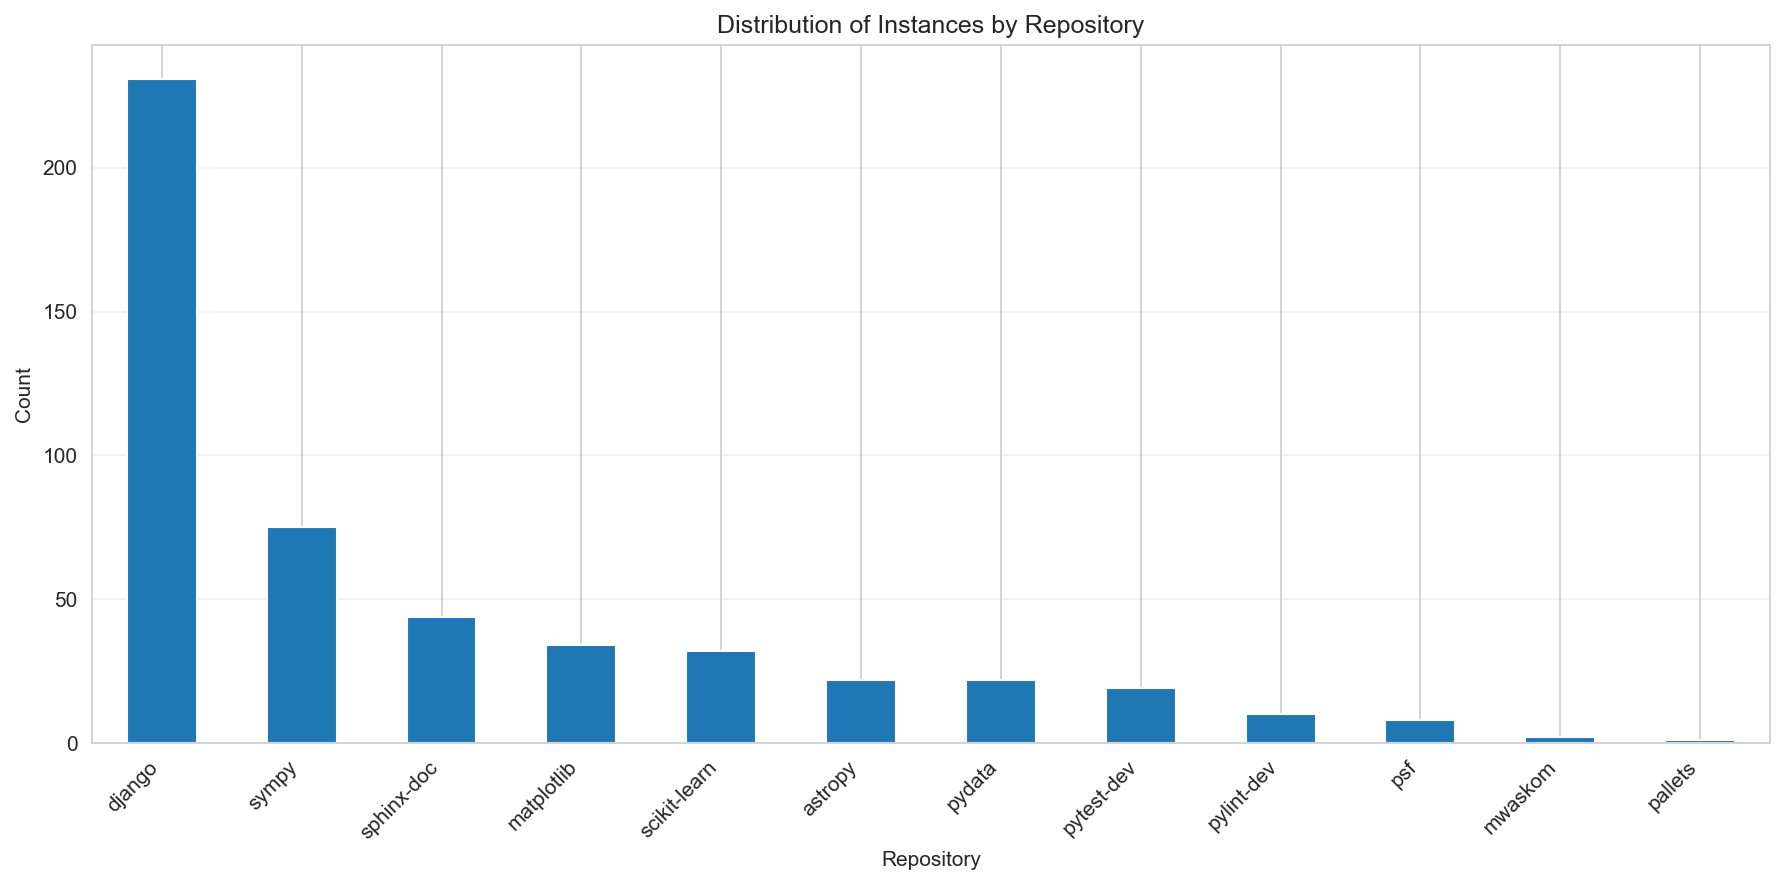

In [5]:
# repository distribution
fig, repo_counts = viz_utils.plot_repo_distribution(df, repo_col='repo_type', figsize=(12, 6))
print('Instances per repository:')
print(repo_counts)
plt.savefig(config.PLOTS_DIR / 'repo_distribution.png', dpi=config.FIGURE_DPI, bbox_inches='tight')
plt.show()

## 2.1. Feature Selection

Total numerical features: 21
Features: ['problem_length_chars', 'problem_length_words', 'problem_length_lines', 'context_num_files', 'context_num_lines', 'context_avg_file_size', 'context_max_file_size', 'context_num_directories', 'patch_files_edited', 'patch_functions_edited', 'patch_lines_added', 'patch_lines_removed', 'patch_lines_edited', 'patch_num_hunks', 'patch_entropy', 'test_fail_to_pass', 'test_pass_to_pass', 'test_total', 'patch_add_remove_ratio', 'patch_avg_hunk_size', 'complexity_score']


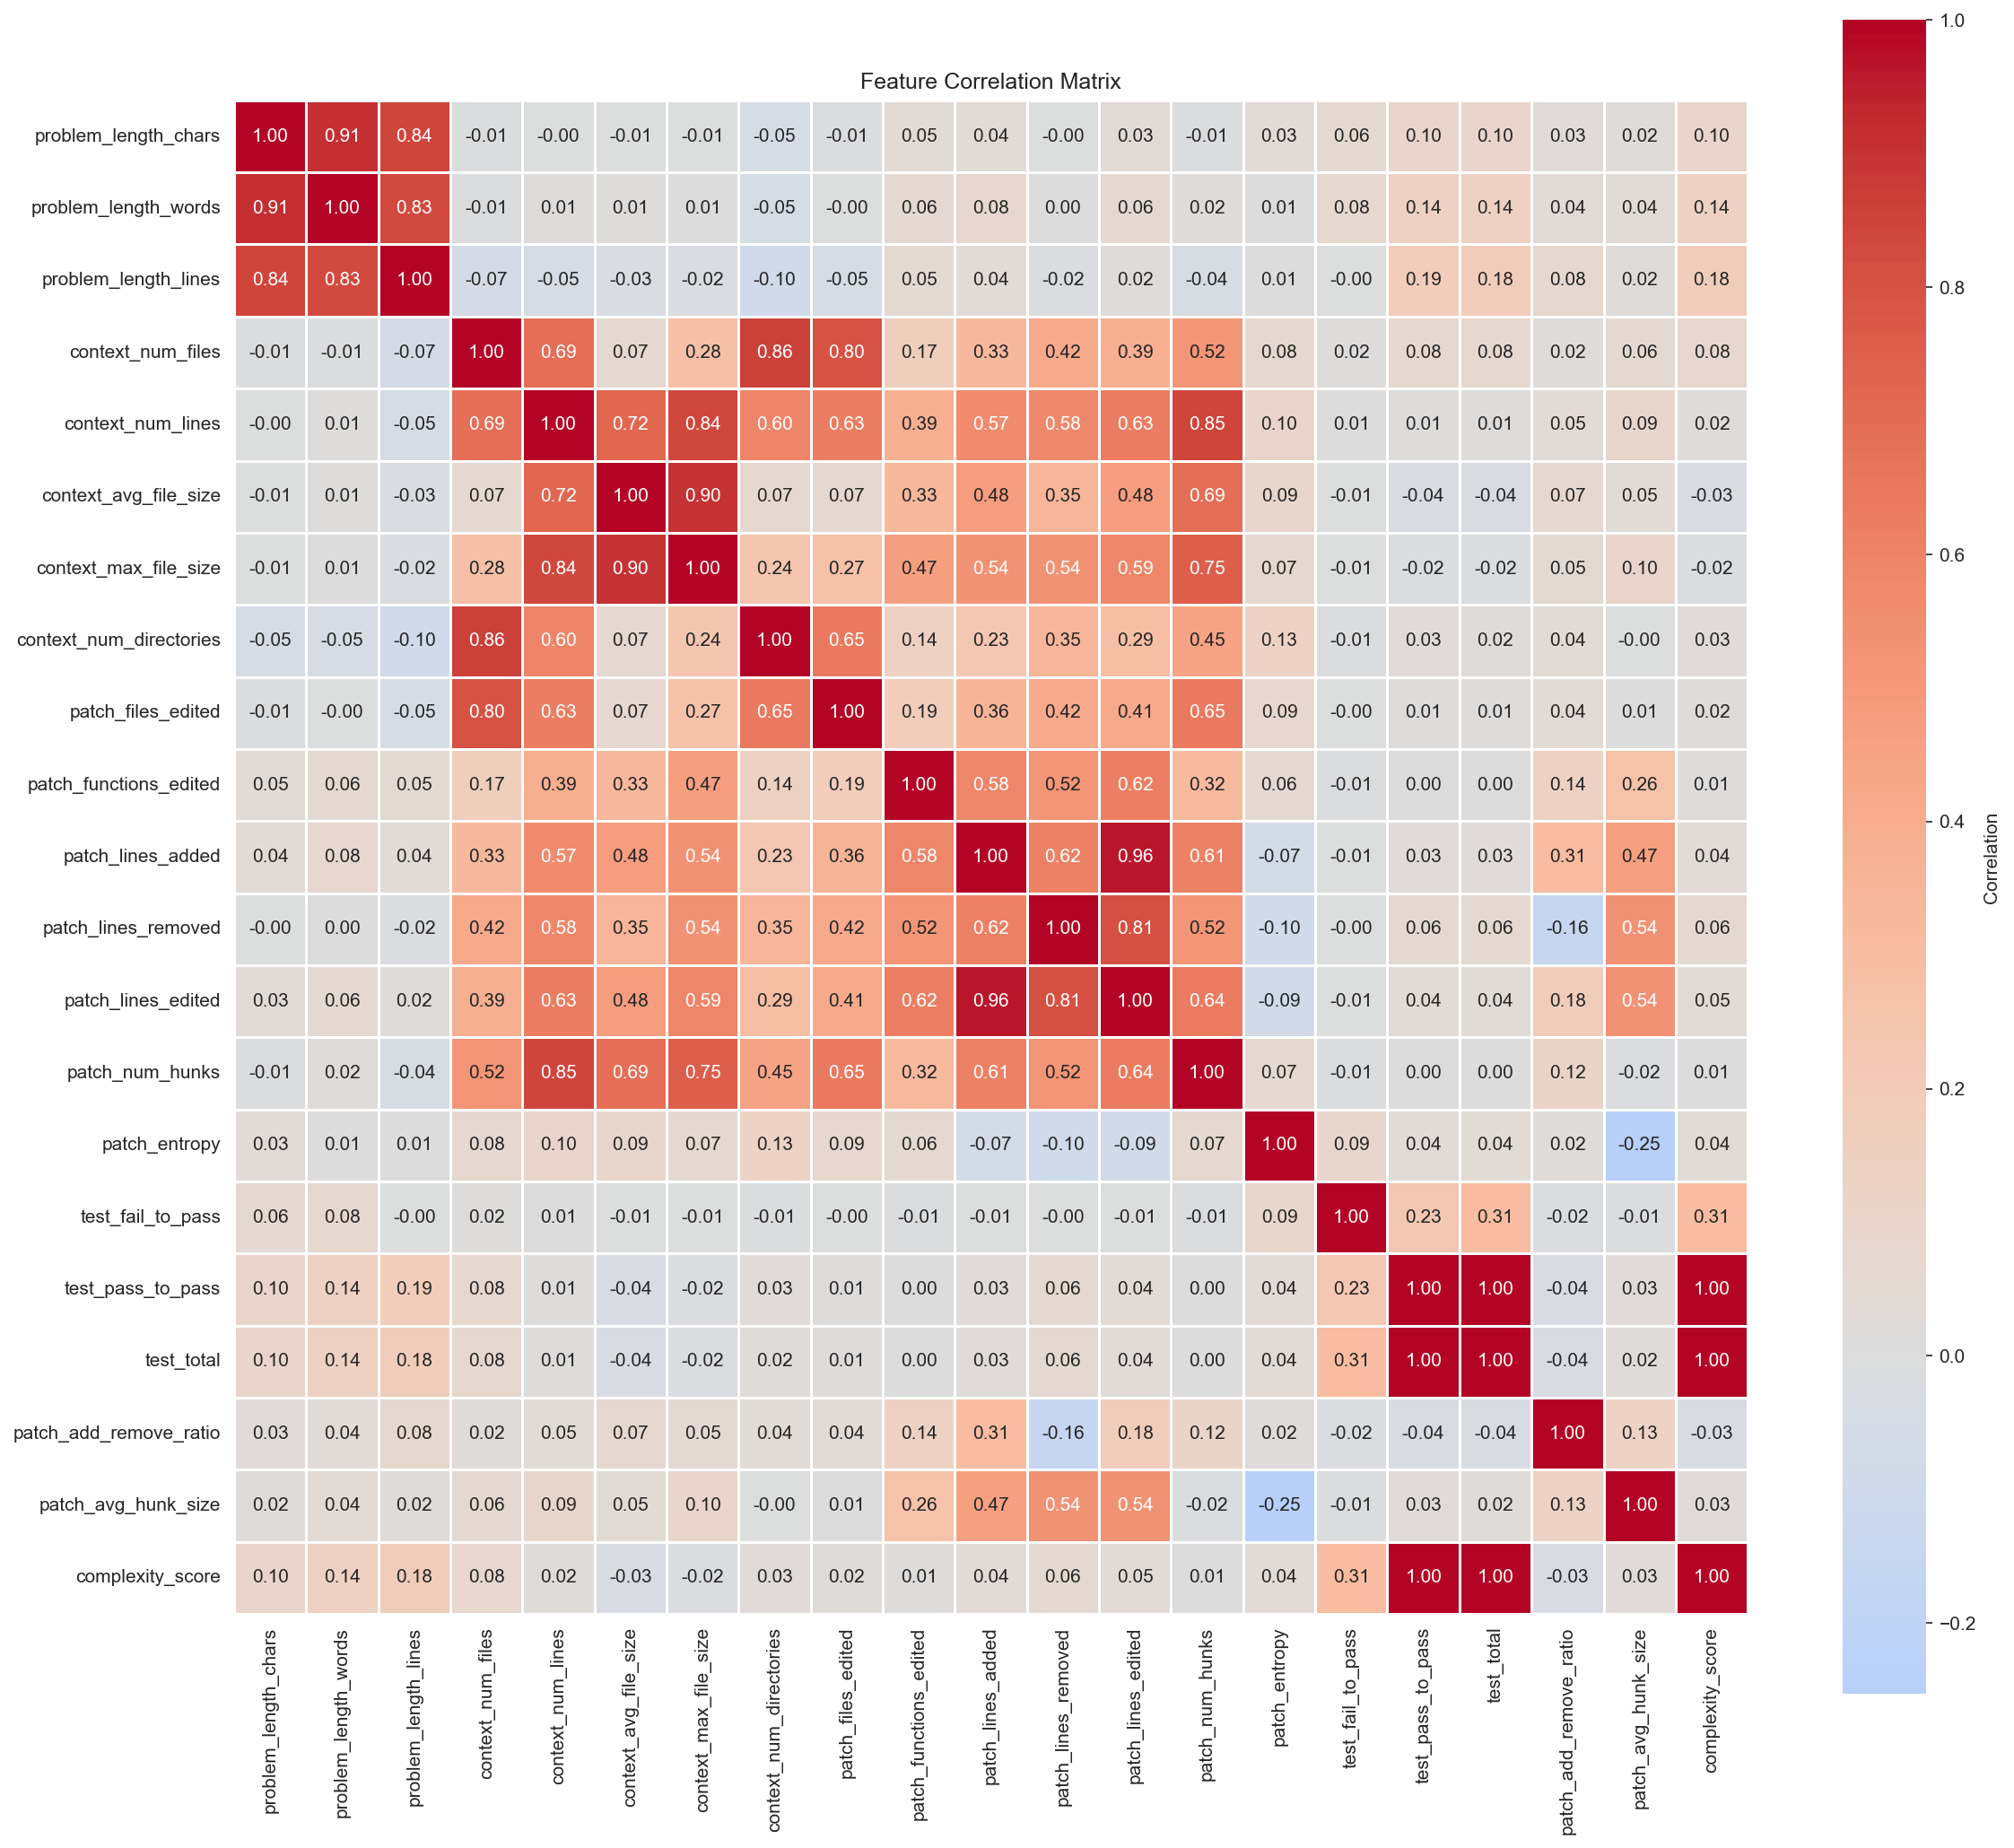

In [ ]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('instance_id') if 'instance_id' in numerical_features else None

print(f"Total numerical features: {len(numerical_features)}")
print(f"Features: {numerical_features}")

# compute correlation matrix
correlation_matrix = df[numerical_features].corr()

fig = viz_utils.plot_correlation_heatmap(df, features=numerical_features, figsize=(16, 14))
plt.savefig(config.PLOTS_DIR / 'correlation_all_features.png', dpi=config.FIGURE_DPI, bbox_inches='tight')
plt.show()


In [ ]:
# find highly correlated pairs (>0.95 correlation)
high_corr_threshold = 0.95
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            high_corr_pairs.append({
                'feature_1': correlation_matrix.columns[i],
                'feature_2': correlation_matrix.columns[j],
                'correlation': correlation_matrix.iloc[i, j]
            })

print("HIGHLY CORRELATED FEATURE PAIRS (|correlation| > 0.95)")

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs)
    print(high_corr_df.to_string(index=False))
    print(f"\nFound {len(high_corr_pairs)} highly correlated pairs")
else:
    print("No highly correlated pairs found")

HIGHLY CORRELATED FEATURE PAIRS (|correlation| > 0.95)
        feature_1          feature_2  correlation
patch_lines_added patch_lines_edited     0.961472
test_pass_to_pass         test_total     0.996831
test_pass_to_pass   complexity_score     0.996756
       test_total   complexity_score     0.999911

Found 4 highly correlated pairs

-- Consider dropping one feature from each pair to avoid multicollinearity


In [ ]:
# compute variance and coefficient of variation for each feature
variance_analysis = pd.DataFrame({
    'feature': numerical_features,
    'mean': [df[feat].mean() for feat in numerical_features],
    'std': [df[feat].std() for feat in numerical_features],
    'variance': [df[feat].var() for feat in numerical_features],
    'cv': [df[feat].std() / df[feat].mean() if df[feat].mean() != 0 else 0 
           for feat in numerical_features],
    'zeros_pct': [(df[feat] == 0).sum() / len(df) * 100 for feat in numerical_features],
    'mode': [df[feat].mode()[0] for feat in numerical_features],
    'mode_pct': [(df[feat] == df[feat].mode()[0]).sum() / len(df) * 100 
                 for feat in numerical_features]
})

# sort by coefficient of variation
variance_analysis = variance_analysis.sort_values('cv')

print(variance_analysis.to_string(index=False))

low_var_features = variance_analysis[
    (variance_analysis['cv'] < 0.5) | (variance_analysis['mode_pct'] > 70)
]

if not low_var_features.empty:
    print(low_var_features[['feature', 'cv', 'zeros_pct', 'mode_pct']].to_string(index=False))
    print(f"\nFound {len(low_var_features)} low-variance features")
else:
    print("All features have sufficient variance")

FEATURE VARIANCE ANALYSIS
                feature        mean         std     variance       cv  zeros_pct       mode  mode_pct
          patch_entropy    4.587222    0.220891 4.879284e-02 0.048154        0.0   3.917621       0.2
context_num_directories    2.240000    0.797290 6.356713e-01 0.355933        0.0   2.000000      81.6
      context_num_files    2.512000    1.473159 2.170196e+00 0.586449        0.0   2.000000      72.6
     patch_files_edited    1.246000    1.069473 1.143772e+00 0.858325        0.0   1.000000      85.8
  context_avg_file_size    1.562717    1.456137 2.120334e+00 0.931798        0.0   1.000000      41.4
   problem_length_words  189.310000  176.522594 3.116023e+04 0.932453        0.0 106.000000       1.2
   problem_length_lines   41.456000   43.882975 1.925715e+03 1.058543        0.0   5.000000       3.8
  context_max_file_size    2.242000    2.599413 6.756950e+00 1.159417        0.0   1.000000      44.6
      context_num_lines    4.074000    4.762551 2.268189

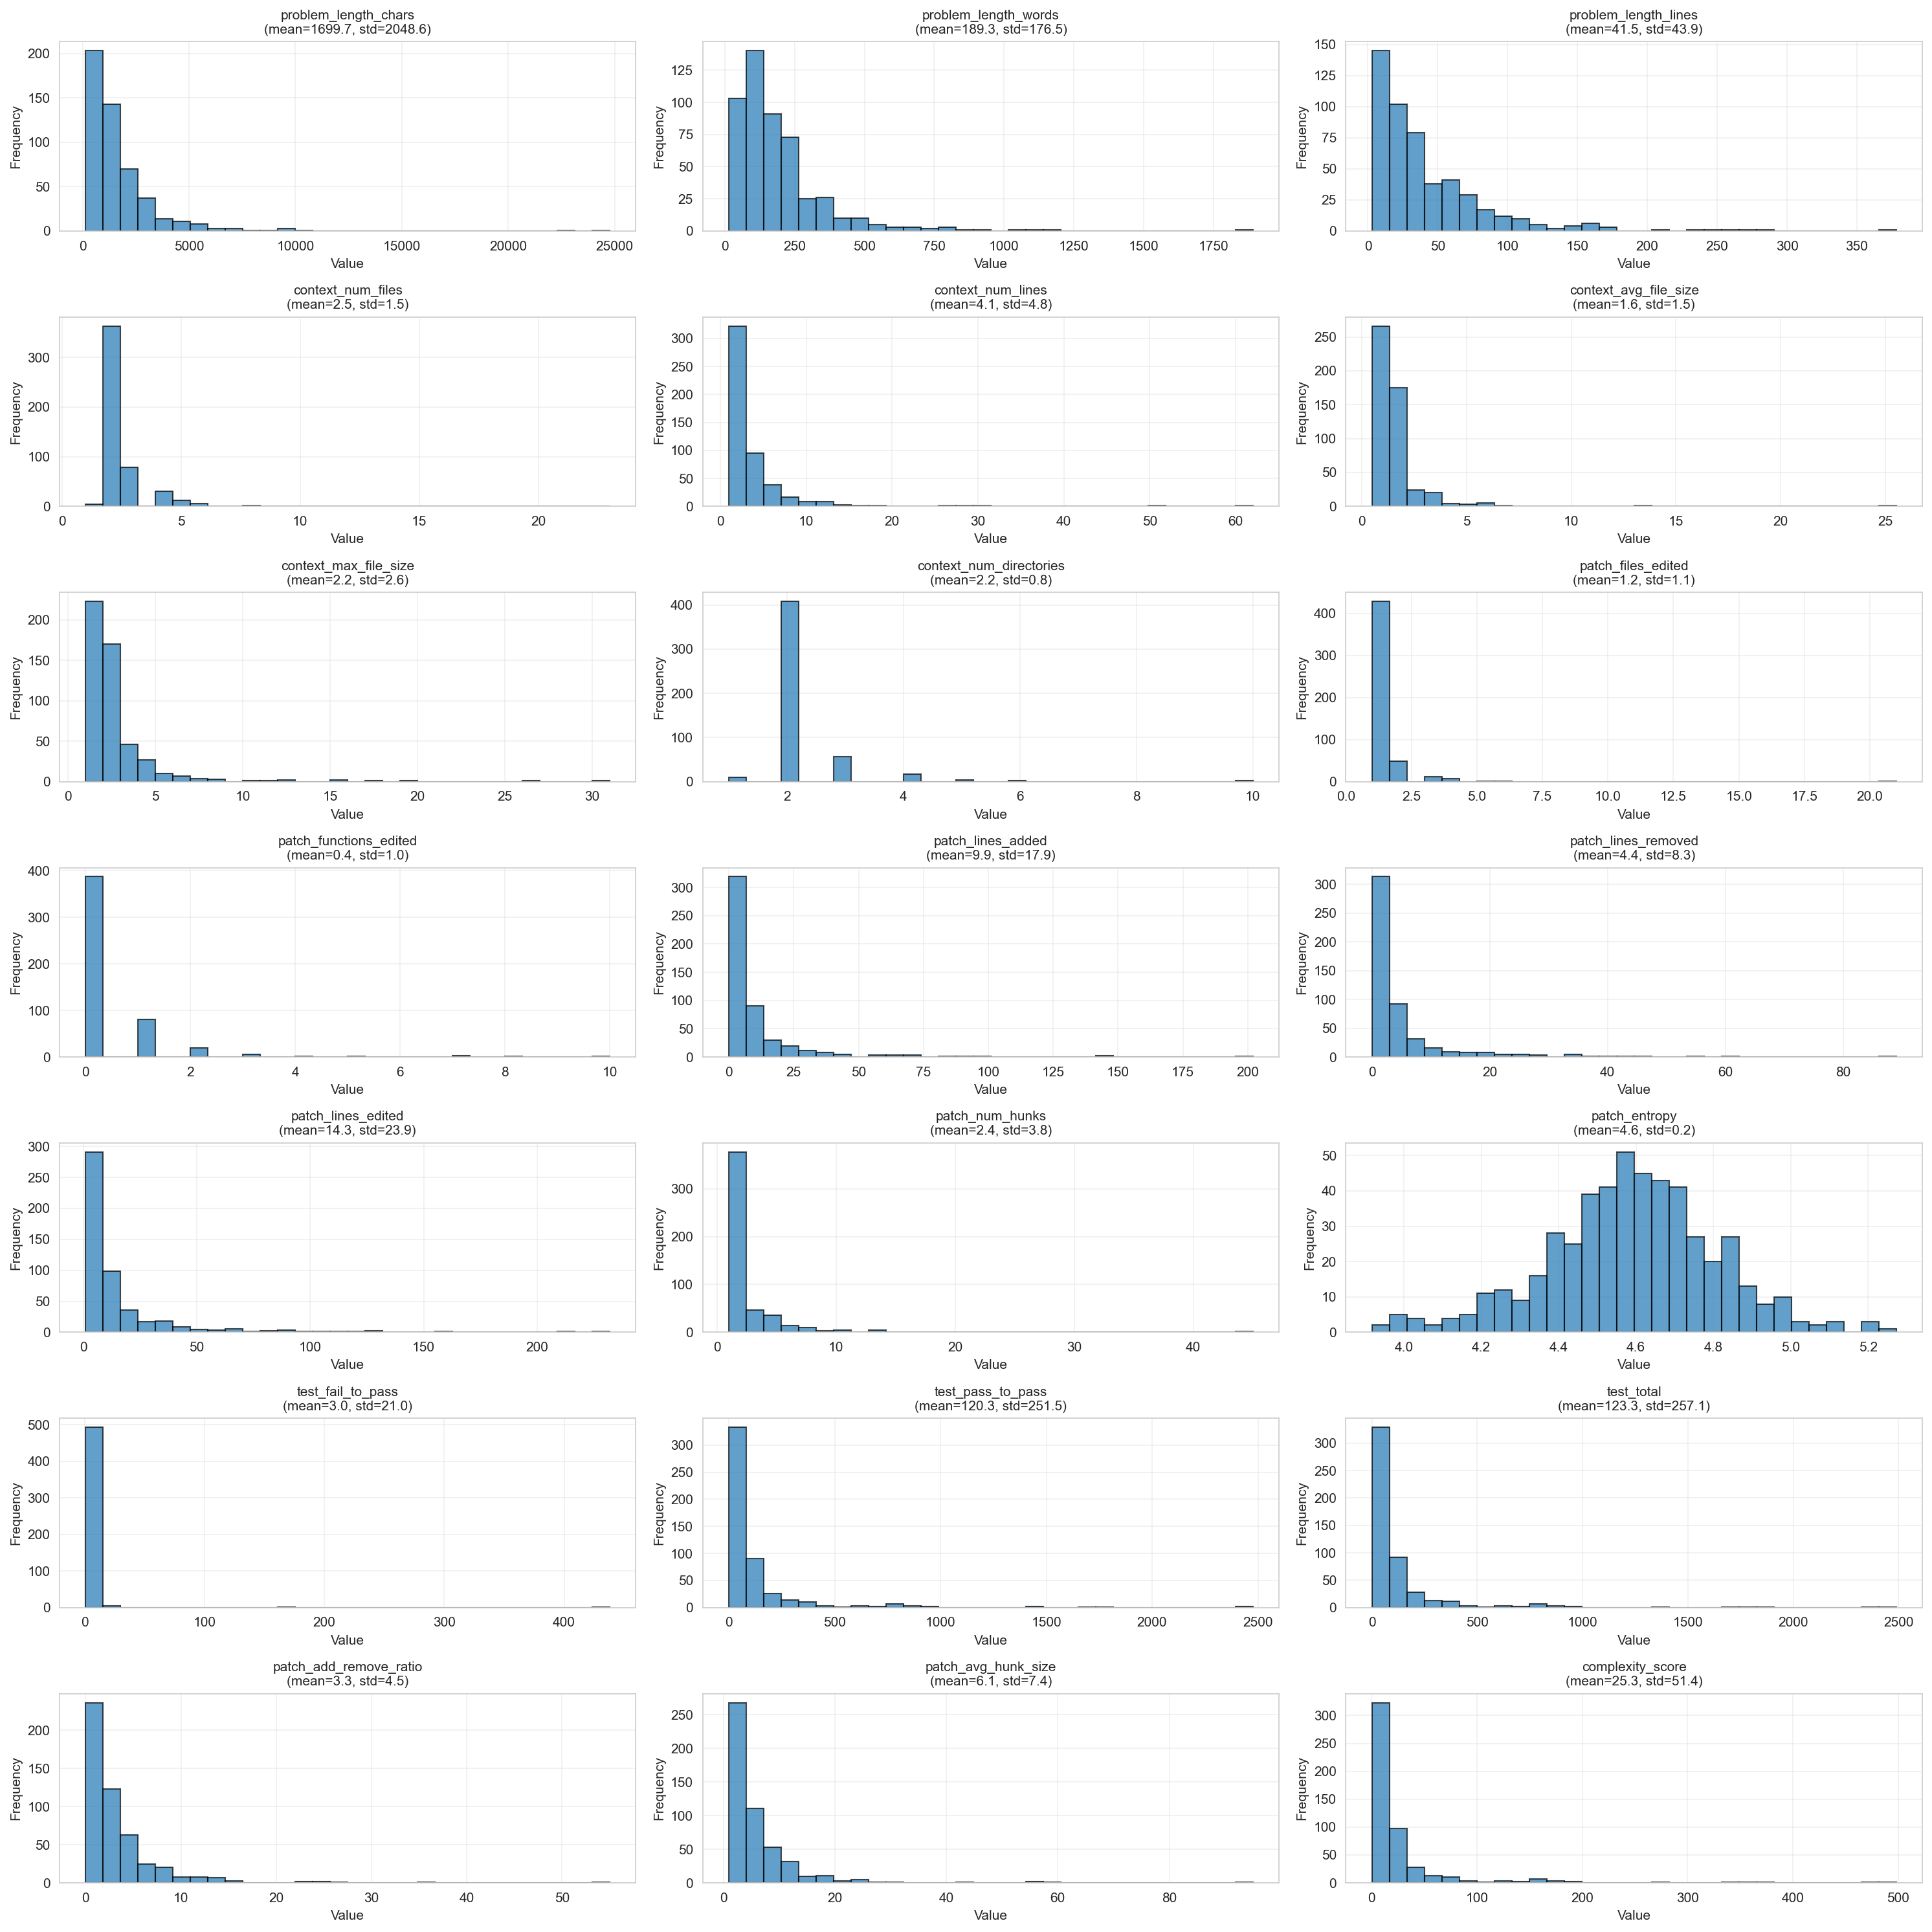

In [11]:
fig = viz_utils.plot_feature_distributions(df, numerical_features, figsize=(20, 5*4), bins=30, show_stats=True)
plt.savefig(config.PLOTS_DIR / 'all_features_histograms.png', dpi=config.FIGURE_DPI, bbox_inches='tight')
plt.show()

In [ ]:
# based on correlation and variance analysis, decide which features to drop
features_to_drop = []
features_to_keep = []
reasons = {}

# rule 1: drop features with >70% same value
for _, row in variance_analysis.iterrows():
    if row['mode_pct'] > 70:
        features_to_drop.append(row['feature'])
        reasons[row['feature']] = f"Low variance: {row['mode_pct']:.1f}% have same value (mode={row['mode']:.1f})"

# rule 2: drop one feature from highly correlated pairs
# keep the one with higher variance
for pair in high_corr_pairs:
    f1, f2 = pair['feature_1'], pair['feature_2']
    
    if f1 in features_to_drop or f2 in features_to_drop:
        continue 
    
    var1 = df[f1].var()
    var2 = df[f2].var()
    
    to_drop = f1 if var1 < var2 else f2
    to_keep = f2 if var1 < var2 else f1
    
    features_to_drop.append(to_drop)
    reasons[to_drop] = f"Highly correlated with {to_keep} (r={pair['correlation']:.3f}), lower variance"

# remove duplicates
features_to_drop = list(set(features_to_drop))
features_to_keep = [f for f in numerical_features if f not in features_to_drop]

print(f"\nKEEPING {len(features_to_keep)} features for PCA:")
for feat in features_to_keep:
    print(f"  - {feat}")

print(f"\nDROPPING {len(features_to_drop)} features:")
for feat in features_to_drop:
    print(f"  - {feat}: {reasons[feat]}")

print(f"Original features: {len(numerical_features)}")
print(f"Reduction: {len(features_to_drop)/len(numerical_features)*100:.1f}%")

FEATURE SELECTION DECISIONS

KEEPING 14 features for PCA:
  - problem_length_chars
  - problem_length_words
  - problem_length_lines
  - context_num_lines
  - context_avg_file_size
  - context_max_file_size
  - patch_lines_removed
  - patch_lines_edited
  - patch_num_hunks
  - patch_entropy
  - test_fail_to_pass
  - test_total
  - patch_add_remove_ratio
  - patch_avg_hunk_size

DROPPING 7 features:
  - test_pass_to_pass: Highly correlated with test_total (r=0.997), lower variance
  - patch_functions_edited: Low variance: 77.4% have same value (mode=0.0)
  - complexity_score: Highly correlated with test_total (r=1.000), lower variance
  - patch_lines_added: Highly correlated with patch_lines_edited (r=0.961), lower variance
  - context_num_directories: Low variance: 81.6% have same value (mode=2.0)
  - context_num_files: Low variance: 72.6% have same value (mode=2.0)
  - patch_files_edited: Low variance: 85.8% have same value (mode=1.0)

-------------------------------------------------

### Feature Selection Rationale

(this rationale can change depending the features selected or not)

Based on the analysis above we systematically selected features for PCA.

1. **Features to KEEP (10 total)**

| Feature | Reason to Keep |
|---------|----------------|
| `problem_length_chars` | Most granular measure of problem complexity; others (words, lines) are redundant (r>0.84) |
| `context_num_files` | Number of relevant files; more interpretable than directories (72.6% vs 81.6% mode) |
| `context_num_lines` | Context size in spans; good variance (CV=1.17) |
| `context_avg_file_size` | Average span size per file; max_file_size is redundant (r=0.90) |
| `patch_files_edited` | Single-file vs multi-file fix; interpretable despite 85.8% mode |
| `patch_lines_edited` | Total change magnitude; components (added/removed) are redundant (r>0.81) |
| `patch_num_hunks` | Number of edit locations; good variance (CV=1.54) |
| `patch_add_remove_ratio` | Add vs remove balance; low correlation with others |
| `test_fail_to_pass` | Bug severity; orthogonal to other features despite 69% mode |
| `test_pass_to_pass` | Regression test count (test suite size); test_total is redundant (r=0.997) |

2. **Features to DROP (11 total)**

| Feature | Reason to Drop |
|---------|----------------|
| `problem_length_words` | r=0.91 with `problem_length_chars` (redundant) |
| `problem_length_lines` | r=0.84 with `problem_length_chars` (redundant) |
| `context_num_directories` | r=0.86 with `context_num_files`, mode=81.6% (redundant + low variance) |
| `context_max_file_size` | r=0.90 with `context_avg_file_size` (redundant) |
| `patch_lines_added` | r=0.96 with `patch_lines_edited` (redundant component) |
| `patch_lines_removed` | r=0.81 with `patch_lines_edited` (redundant component) |
| `patch_entropy` | CV=0.048 - nearly constant (~4.59±0.22 for all patches) |
| `patch_functions_edited` | 77.4% zeros (unreliable detection, low information) |
| `patch_avg_hunk_size` | Derived from `patch_lines_edited / patch_num_hunks` (redundant) |
| `test_total` | r=0.997 with `test_pass_to_pass` (just adds constant ~1) |
| `complexity_score` | r=1.000 with `test_total` (dominated by test_total component) |

**Summary**
- **Original features**: 21
- **Features kept**: 10
- **Features dropped**: 11
- **Reduction**: 52.4%

**Dropping criteria**:
- Correlation > 0.80 with another feature → Keep the more interpretable/higher variance one
- CV < 0.1 → Nearly constant

In [13]:
# manual feature selection based on correlation, variance, and distribution analysis
features_to_keep = [
    'problem_length_chars',
    
    'context_num_files',
    'context_num_lines',
    'context_avg_file_size',
    
    'patch_files_edited',
    'patch_lines_edited',
    'patch_num_hunks',
    'patch_add_remove_ratio',
    
    'test_fail_to_pass',
    'test_pass_to_pass',
]

df_pca = df[features_to_keep].copy()

## 2.2. Feature Preprocessing

Prepare features for PCA analysis.

In [14]:
from sklearn.preprocessing import StandardScaler

df = df_pca.copy()

# separate numerical and categorical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

id_cols = ['instance_id']
numerical_features = [f for f in numerical_features if f not in id_cols]

print(f'Numerical features ({len(numerical_features)}): {numerical_features}')
print(f'\nCategorical features ({len(categorical_features)}): {categorical_features}')

Numerical features (10): ['problem_length_chars', 'context_num_files', 'context_num_lines', 'context_avg_file_size', 'patch_files_edited', 'patch_lines_edited', 'patch_num_hunks', 'patch_add_remove_ratio', 'test_fail_to_pass', 'test_pass_to_pass']

Categorical features (0): []


In [15]:
df_clean = df.copy()
for feature in numerical_features:
    if df_clean[feature].isnull().any():
        median_val = df_clean[feature].median()
        df_clean[feature].fillna(median_val, inplace=True)
        print(f'Filled missing values in {feature} with median: {median_val}')

print(f'\nRemaining missing values: {df_clean[numerical_features].isnull().sum().sum()}')


Remaining missing values: 0


In [ ]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_clean[numerical_features]),
    columns=numerical_features,
    index=df_clean.index
)

print('Features standardized!')
print(f'\nMean (should be close to 0): {df_scaled.mean().mean():.6f}')
print(f'Std (should be close to 1): {df_scaled.std().mean():.6f}')

Features standardized!

Mean (should be ~0): 0.000000
Std (should be ~1): 1.001002


## 3. PCA Computation

Perform PCA and analyze variance explained.

In [17]:
from sklearn.decomposition import PCA

pca_full = PCA()
pca_full.fit(df_scaled)

print(f'Total variance: {pca_full.explained_variance_ratio_.sum():.4f}')

Total variance: 1.0000


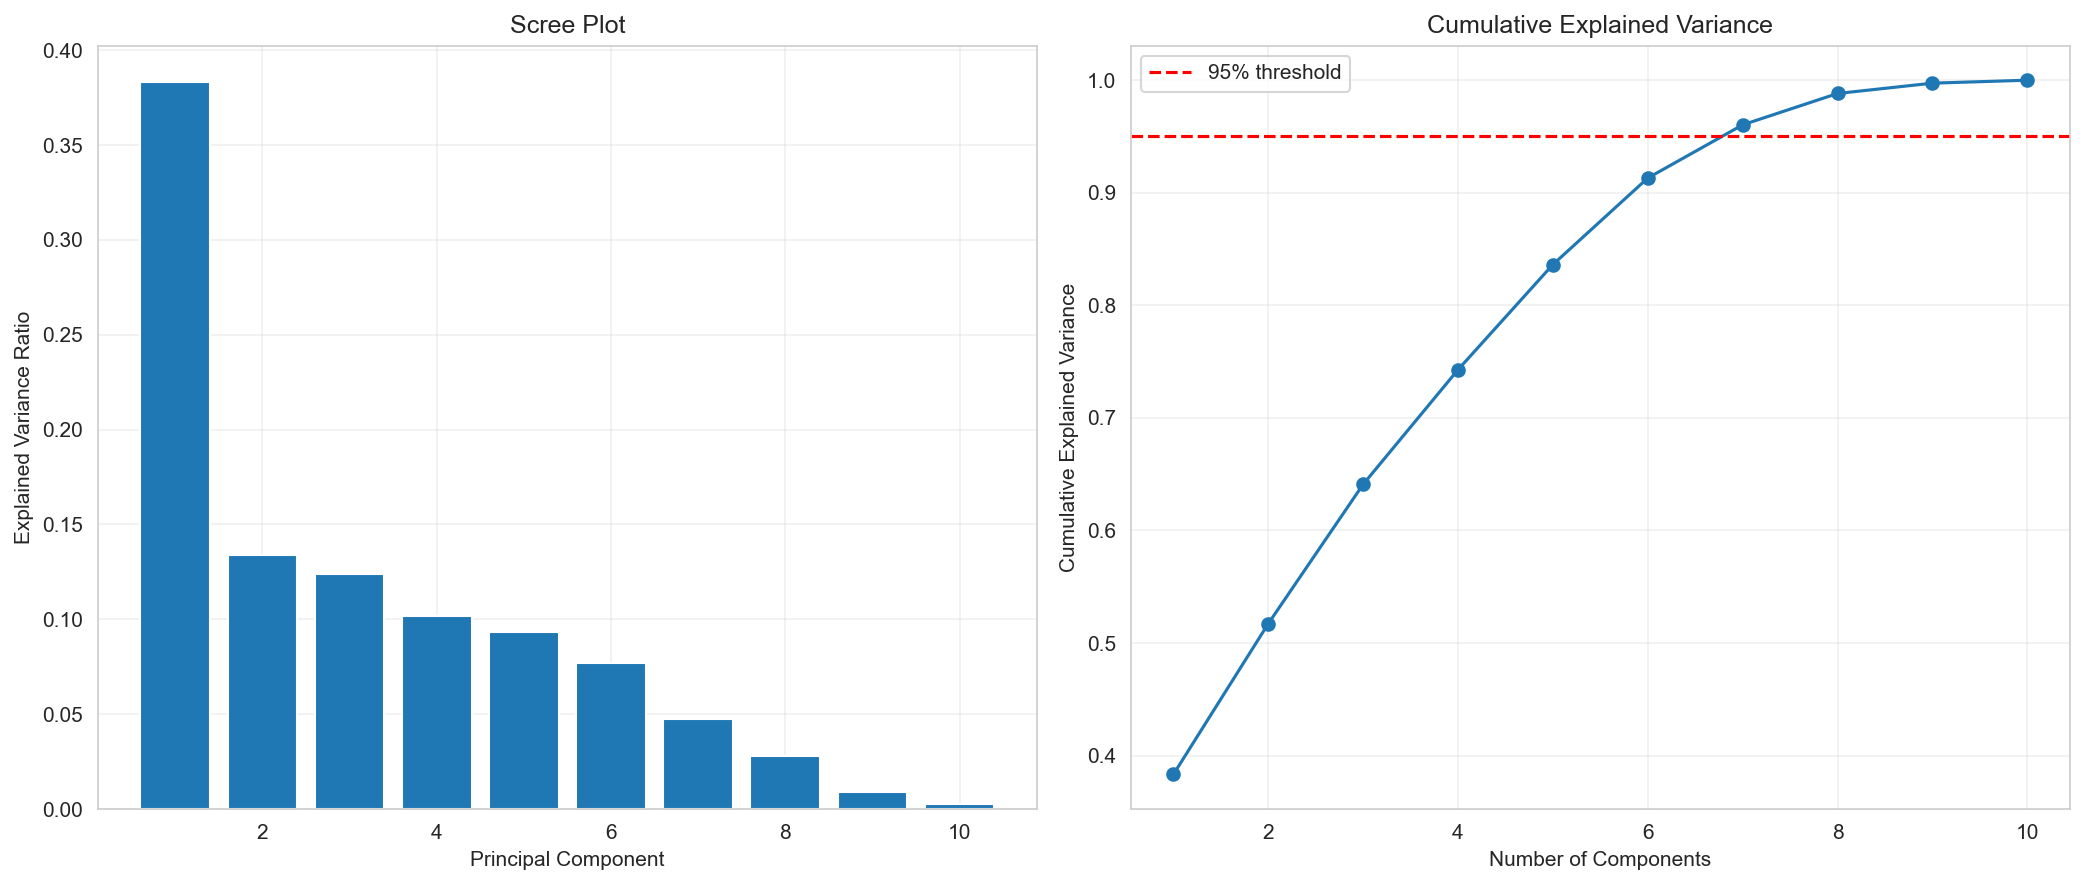


Components for 95% variance: 7
Variance in first 3 components: 0.6410


In [18]:
fig = viz_utils.plot_scree(pca_full, figsize=(14, 6))
plt.savefig(config.PLOTS_DIR / 'scree_plot.png', dpi=config.FIGURE_DPI, bbox_inches='tight')
plt.show()

cumsum = np.cumsum(pca_full.explained_variance_ratio_)
n_components_95 = np.argmax(cumsum >= config.PCA_VARIANCE_THRESHOLD) + 1

print(f'\nComponents for 95% variance: {n_components_95}')
print(f'Variance in first 3 components: {cumsum[2]:.4f}')

In [19]:
n_components = config.PCA_N_COMPONENTS
pca = PCA(n_components=n_components)
pca_scores = pca.fit_transform(df_scaled)

pca_df = pd.DataFrame(
    pca_scores,
    columns=[f'PC{i+1}' for i in range(n_components)],
    index=df_clean.index
)

for col in categorical_features + id_cols:
    if col in df_clean.columns:
        pca_df[col] = df_clean[col].values

print(f'PCA with {n_components} components')
print(f'Total variance: {pca.explained_variance_ratio_.sum():.4f}')
print(f'\nVariance per component:')
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f'  PC{i+1}: {var:.4f} ({var*100:.2f}%)')

PCA with 3 components
Total variance: 0.6410

Variance per component:
  PC1: 0.3833 (38.33%)
  PC2: 0.1339 (13.39%)
  PC3: 0.1238 (12.38%)


## 4. Component Interpretation

Understand what each principal component represents.

In [ ]:
loadings_df = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(n_components)],
    index=numerical_features
)
loadings_df

Principal Component Loadings:


,PC1,PC2,PC3
problem_length_chars,0.000411,-0.154559,0.370122
context_num_files,0.375143,-0.414032,-0.303173
context_num_lines,0.485865,0.053544,0.039395
context_avg_file_size,0.323259,0.486158,0.362144
patch_files_edited,0.385960,-0.365932,-0.326511
patch_lines_edited,0.380729,0.135044,0.150562
patch_num_hunks,0.468963,0.118849,0.065201
patch_add_remove_ratio,0.068072,0.201557,0.112245
test_fail_to_pass,0.001256,-0.380308,0.511405
test_pass_to_pass,0.015013,-0.462543,0.480346


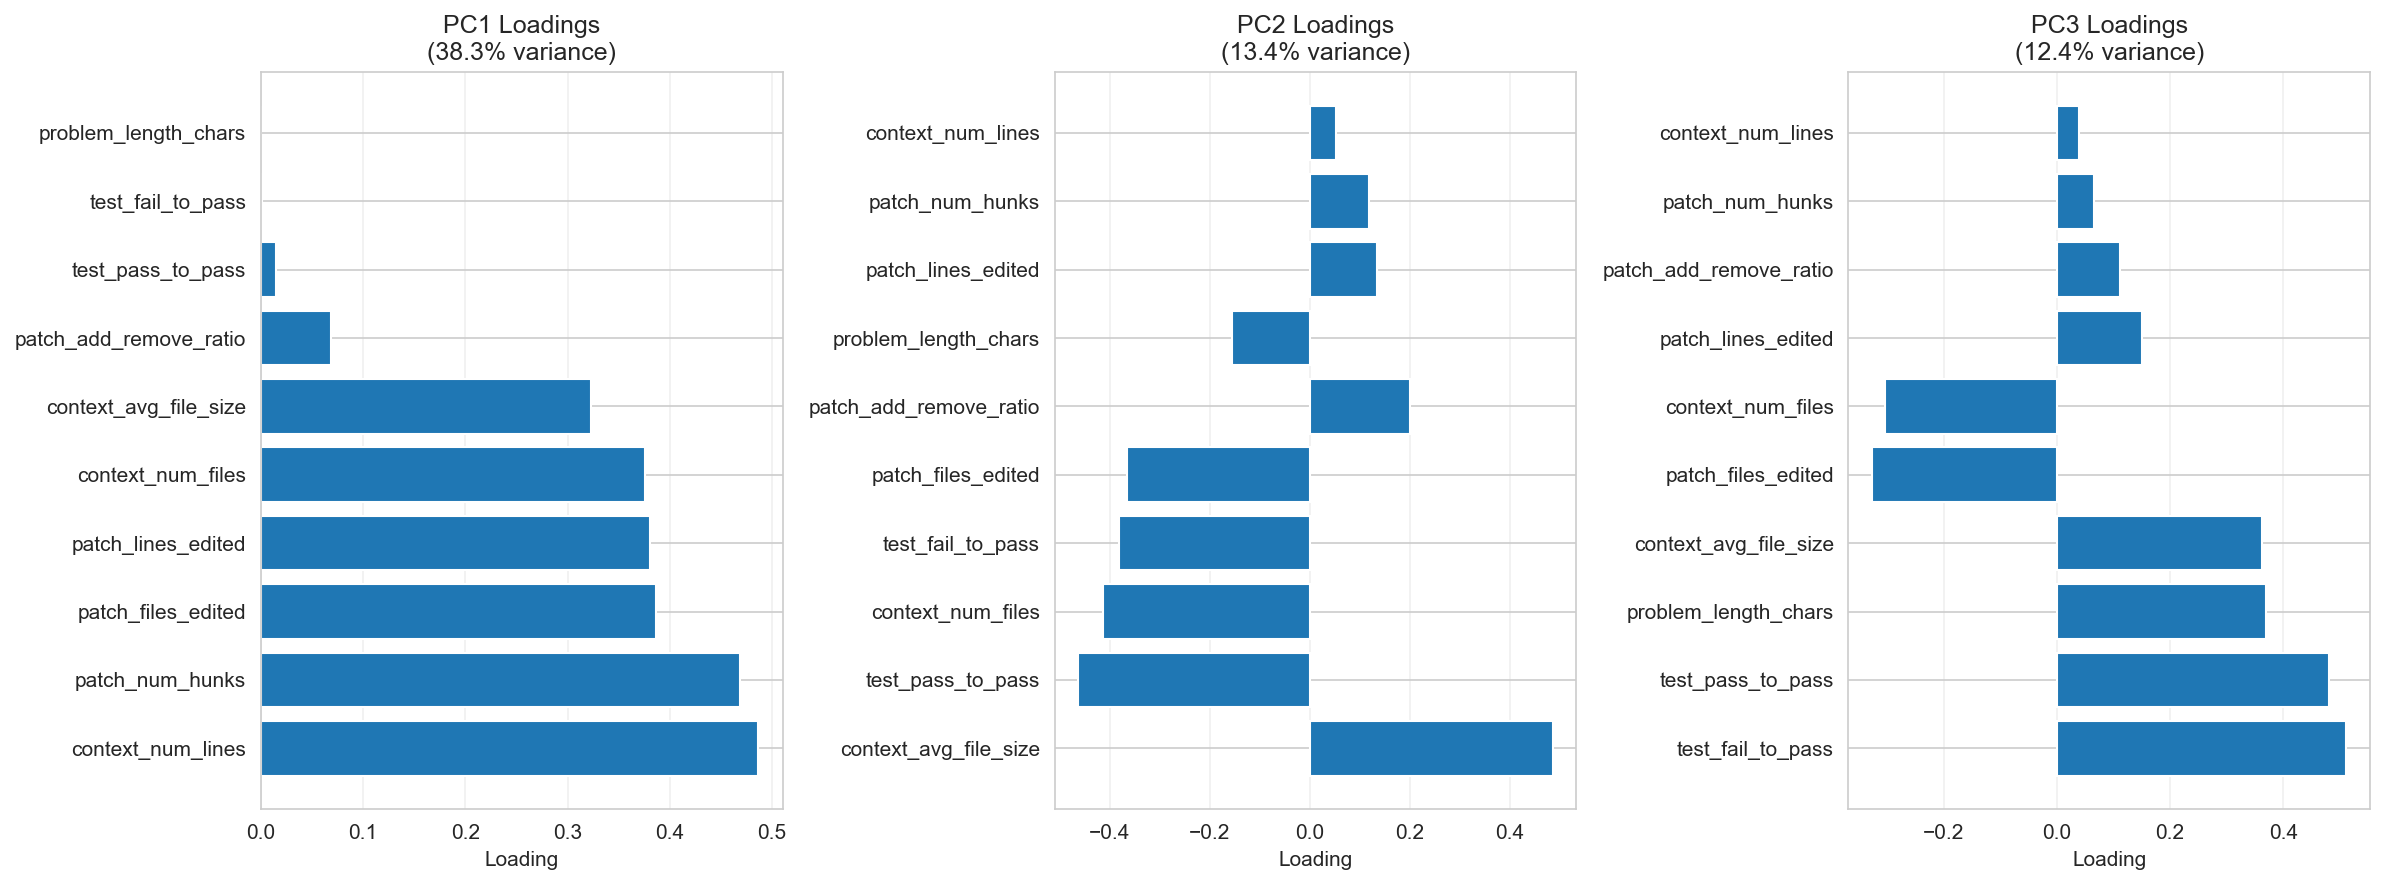

In [21]:
fig = viz_utils.plot_loadings(pca, numerical_features, 
                               components=list(range(min(3, n_components))),
                               figsize=(16, 6))
plt.savefig(config.PLOTS_DIR / 'loadings.png', dpi=config.FIGURE_DPI, bbox_inches='tight')
plt.show()

In [ ]:
def interpret_component(pc_idx, top_n=5):
    loadings = pca.components_[pc_idx]
    feature_importance = pd.DataFrame({
        'feature': numerical_features,
        'loading': loadings,
        'abs_loading': np.abs(loadings)
    }).sort_values('abs_loading', ascending=False)
    
    print(f'\nPC{pc_idx+1} ({pca.explained_variance_ratio_[pc_idx]*100:.2f}% variance):')
    print(f'Top {top_n} features:')
    for i, row in feature_importance.head(top_n).iterrows():
        direction = 'increases' if row['loading'] > 0 else 'decreases'
        print(f"  {row['feature']:30s} ({direction:9s}): {row['loading']:7.3f}")
    
    return feature_importance

for i in range(min(3, n_components)):
    interpret_component(i, top_n=7)


PC1 (38.33% variance):
Top 7 features:
  context_num_lines              (increases):   0.486
  patch_num_hunks                (increases):   0.469
  patch_files_edited             (increases):   0.386
  patch_lines_edited             (increases):   0.381
  context_num_files              (increases):   0.375
  context_avg_file_size          (increases):   0.323
  patch_add_remove_ratio         (increases):   0.068

PC2 (13.39% variance):
Top 7 features:
  context_avg_file_size          (increases):   0.486
  test_pass_to_pass              (decreases):  -0.463
  context_num_files              (decreases):  -0.414
  test_fail_to_pass              (decreases):  -0.380
  patch_files_edited             (decreases):  -0.366
  patch_add_remove_ratio         (increases):   0.202
  problem_length_chars           (decreases):  -0.155

PC3 (12.38% variance):
Top 7 features:
  test_fail_to_pass              (increases):   0.511
  test_pass_to_pass              (increases):   0.480
  problem_length

In [ ]:
# analyze with and without outliers
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

outlier_threshold = 3

pca_df['is_outlier'] = (
    (np.abs(pca_df['PC1'] - pca_df['PC1'].mean()) > outlier_threshold * pca_df['PC1'].std()) |
    (np.abs(pca_df['PC2'] - pca_df['PC2'].mean()) > outlier_threshold * pca_df['PC2'].std()) |
    (np.abs(pca_df['PC3'] - pca_df['PC3'].mean()) > outlier_threshold * pca_df['PC3'].std())
)

n_outliers = pca_df['is_outlier'].sum()
print(f"Outliers detected: {n_outliers} ({n_outliers/len(pca_df)*100:.1f}%)")

df_no_outliers = df_pca[~pca_df['is_outlier']]
print(f"\nRemaining instances: {len(df_no_outliers)}")

scaler_no_outliers = StandardScaler()
X_scaled_no_outliers = scaler_no_outliers.fit_transform(df_no_outliers)

pca_no_outliers = PCA(n_components=3)
X_pca_no_outliers = pca_no_outliers.fit_transform(X_scaled_no_outliers)

print("\nVariance explained (without outliers):")
for i, var in enumerate(pca_no_outliers.explained_variance_ratio_):
    print(f"  PC{i+1}: {var:.4f} ({var*100:.2f}%)")
print(f"  Total (3 PCs): {pca_no_outliers.explained_variance_ratio_[:3].sum():.4f}")

print("\nPC1 loadings (without outliers):")
loadings_no_outliers = pd.DataFrame(
    pca_no_outliers.components_.T,
    columns=['PC1', 'PC2', 'PC3'],
    index=features_to_keep
)
print(loadings_no_outliers['PC1'].sort_values(ascending=False))

Outliers detected: 17 (3.4%)

Remaining instances: 483

Variance explained (without outliers):
  PC1: 0.3796 (37.96%)
  PC2: 0.1244 (12.44%)
  PC3: 0.1065 (10.65%)
  Total (3 PCs): 0.6106

PC1 loadings (without outliers):
context_num_lines         0.456206
patch_num_hunks           0.431807
patch_files_edited        0.410880
patch_lines_edited        0.386499
context_num_files         0.380370
context_avg_file_size     0.296497
test_fail_to_pass         0.203055
patch_add_remove_ratio    0.103654
test_pass_to_pass         0.049862
problem_length_chars     -0.012692
Name: PC1, dtype: float64


### Principal Component Interpretation

Based on feature loadings and variance explained, the three principal components capture distinct aspects of SWE-bench instance complexity:

1. **PC1 (38.33%): Problem Scope & Structural Complexity**

    **Key features**: `context_num_lines` (+0.49), `patch_num_hunks` (+0.47), `patch_files_edited` (+0.39), `patch_lines_edited` (+0.38)

    **Interpretation**: All loadings are positive, indicating this is a **size/scope dimension**. High PC1 instances involve multi-file, distributed changes with many edit locations and large context windows. Low PC1 instances are focused, single-file fixes with minimal context.

    **Captures**: Localized fix vs. architectural change


2. **PC2 (13.39%): Context Depth vs. Test Suite Size**

    **Key features**: `context_avg_file_size` (+0.49), `test_pass_to_pass` (-0.46), `context_num_files` (-0.41), `test_fail_to_pass` (-0.38)

    **Interpretation**: Mixed signs indicate a **contrast dimension**. High PC2 instances have concentrated context in few files with small test suites. Low PC2 instances have distributed context across many files with large test suites (typical of large repositories like Django/Matplotlib).

    **Captures**: Deep single-file issues vs. shallow multi-file issues in large codebases


3. **PC3 (12.38%): Test Coverage & Documentation Quality**

    **Key features**: `test_fail_to_pass` (+0.51), `test_pass_to_pass` (+0.48), `problem_length_chars` (+0.37), `patch_files_edited` (-0.33)

    **Interpretation**: High PC3 instances have many tests (both failing and regression) and detailed problem statements, but affect fewer files. This dimension captures **bug severity and documentation quality**.

    **Captures**: Well-tested, documented issues vs. under-tested, terse issues




**Summary**

The three components are largely **orthogonal** and capture complementary aspects:
- **PC1**: How big is the change? (scope)
- **PC2**: How concentrated is the change? (depth vs. breadth)
- **PC3**: How well-tested and documented is the issue? (severity)

Together, these 3 components explain **64.1%** of total variance and provide an interpretable coordinate system for analyzing SWE-bench instances.

## 5. Visualizations

Visualize the problem space.

In [ ]:
# add metadata from the original full dataframe

df_full = pd.read_csv(config.OUTPUT_CSV)

print(f"\nOriginal CSV columns: {df_full.columns.tolist()}")

if 'instance_id' in df_full.columns:
    pca_df['instance_id'] = df_full['instance_id'].values
    print("Added instance_id")
else:
    print("instance_id not found")

if 'repo_type' in df_full.columns:
    pca_df['repo_type'] = df_full['repo_type'].values
else:
    print("repo_type not found")
    if 'instance_id' in df_full.columns:
        pca_df['repo_type'] = df_full['instance_id'].str.split('__').str[0]
        print("Extracted repo_type from instance_id")

print(pca_df.head())


Original CSV columns: ['instance_id', 'repo_type', 'problem_length_chars', 'problem_length_words', 'problem_length_lines', 'context_num_files', 'context_num_lines', 'context_avg_file_size', 'context_max_file_size', 'context_num_directories', 'patch_files_edited', 'patch_functions_edited', 'patch_lines_added', 'patch_lines_removed', 'patch_lines_edited', 'patch_num_hunks', 'patch_entropy', 'test_fail_to_pass', 'test_pass_to_pass', 'test_total', 'patch_add_remove_ratio', 'patch_avg_hunk_size', 'complexity_score', 'problem_size', 'patch_scope']
Added instance_id
Added repo_type

PCA DataFrame shape: (500, 6)
PCA DataFrame columns: ['PC1', 'PC2', 'PC3', 'is_outlier', 'instance_id', 'repo_type']

Sample:
        PC1       PC2       PC3  is_outlier         instance_id repo_type
0 -0.943889  0.196249 -0.614694       False  psf__requests-1142       psf
1 -0.537721 -0.255876  1.144179       False  psf__requests-1724       psf
2 -0.813420 -0.076930 -0.259256       False  psf__requests-1766     

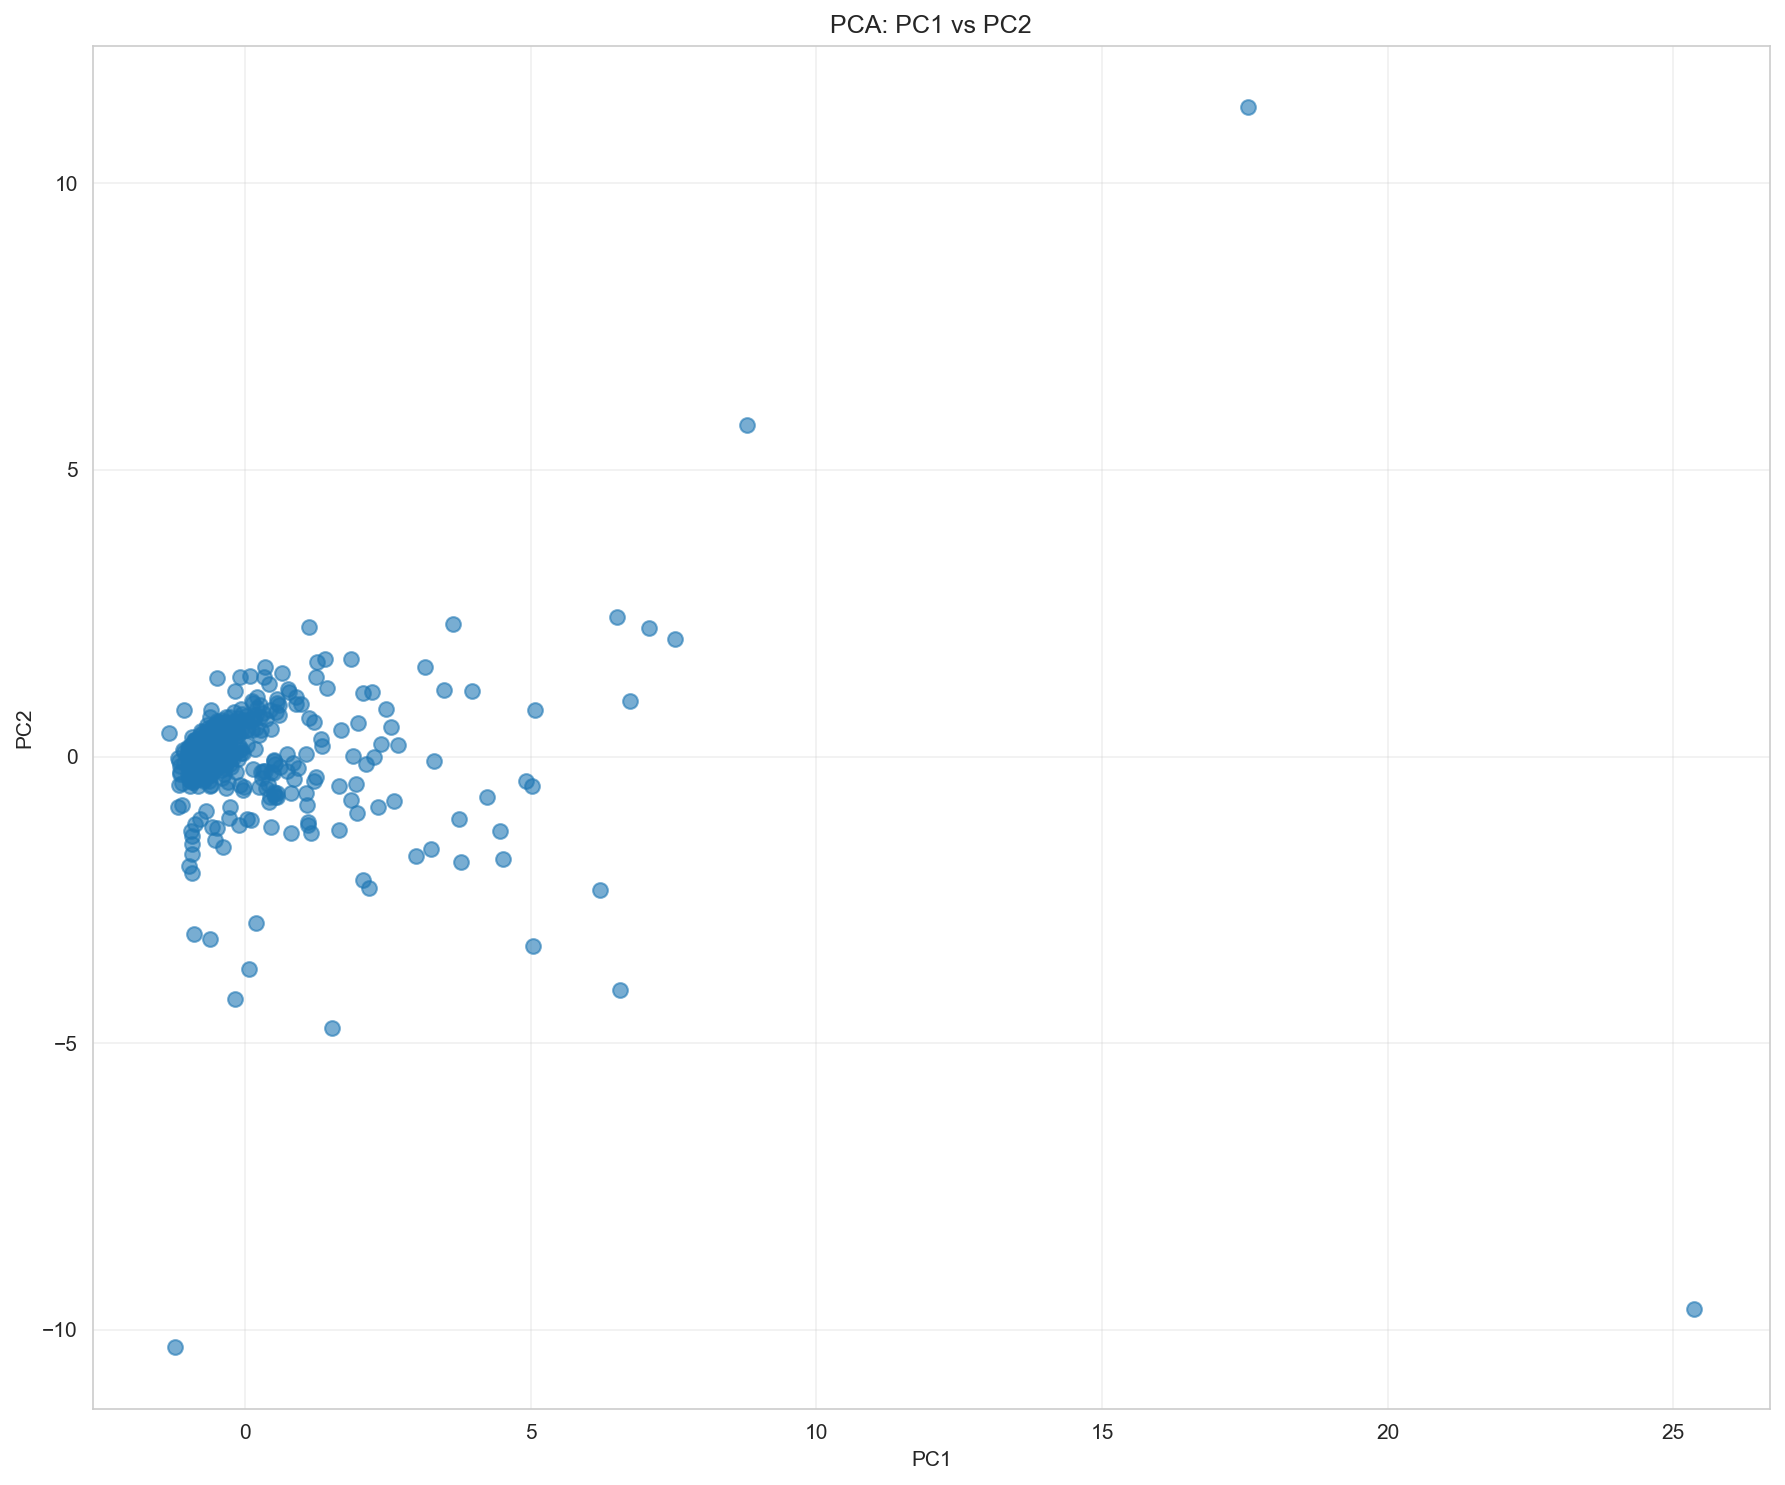

In [25]:
# 2D scatter
fig = viz_utils.plot_pca_2d(
    pca_df, 
    pc1='PC1', 
    pc2='PC2',
    figsize=(12, 10),
    title='PCA: PC1 vs PC2'
)
plt.savefig(config.PLOTS_DIR / 'pca_2d_unlabeled.png', dpi=config.FIGURE_DPI, bbox_inches='tight')
plt.show()

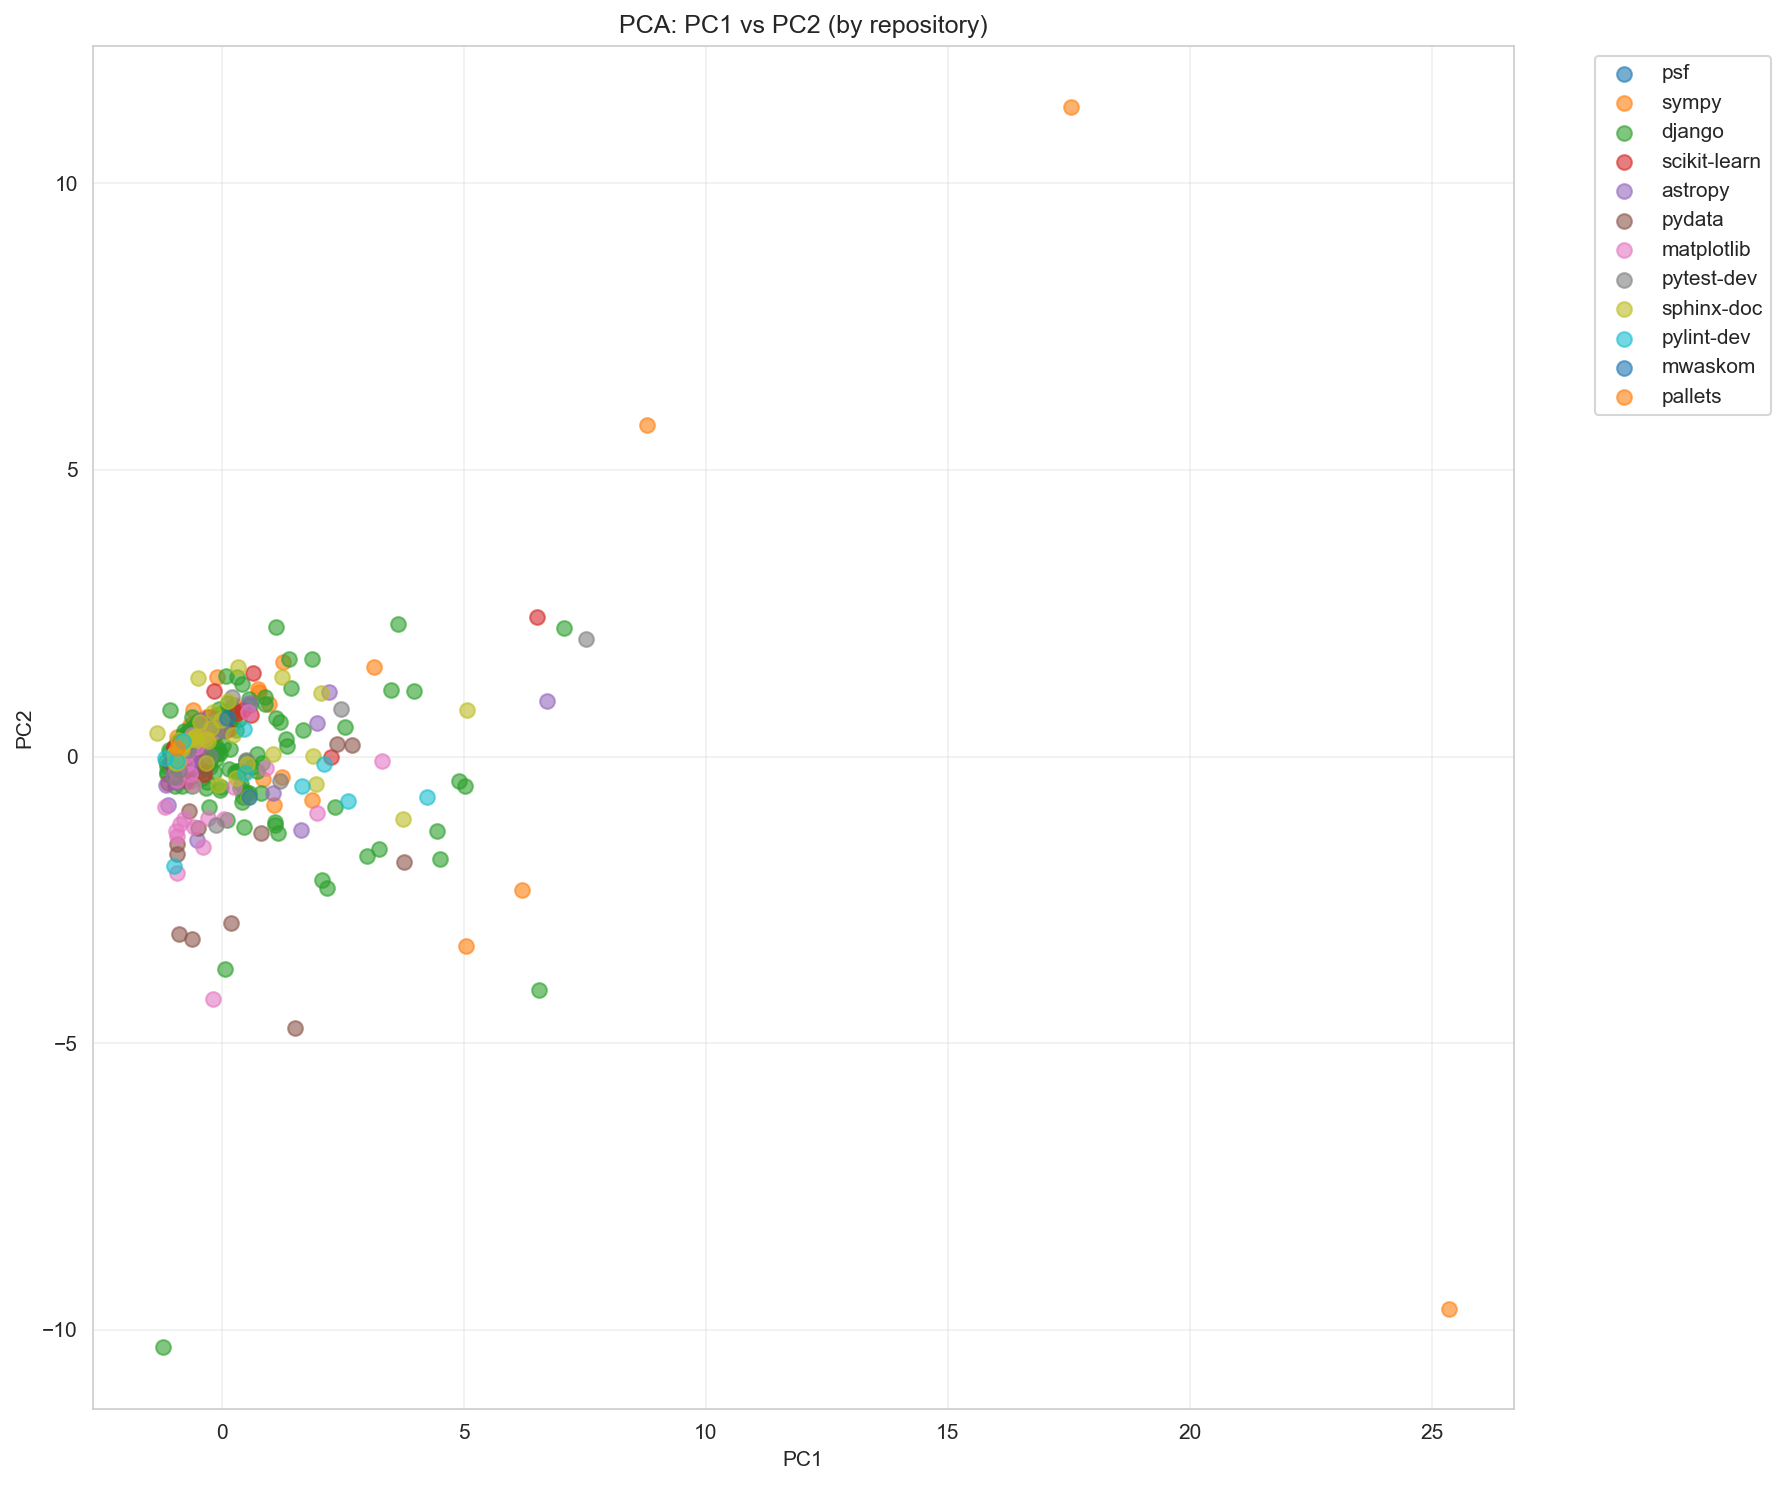

In [27]:
# colored by repository
fig = viz_utils.plot_pca_2d(
    pca_df,
    pc1='PC1',
    pc2='PC2', 
    color_by='repo_type',
    figsize=(12, 10),
    title='PCA: PC1 vs PC2 (by repository)'
)
plt.savefig(config.PLOTS_DIR / 'pca_2d_by_repo.png', dpi=config.FIGURE_DPI, bbox_inches='tight')
plt.show()

In [28]:
# interactive 3D
if config.INTERACTIVE_PLOTS:
    fig = viz_utils.plot_pca_3d_interactive(
        pca_df,
        pc1='PC1',
        pc2='PC2',
        pc3='PC3',
        color_by='repo_type',
        hover_data=['instance_id'],
        title='3D PCA Projection'
    )
    fig.show()
else:
    print('Interactive plots disabled')

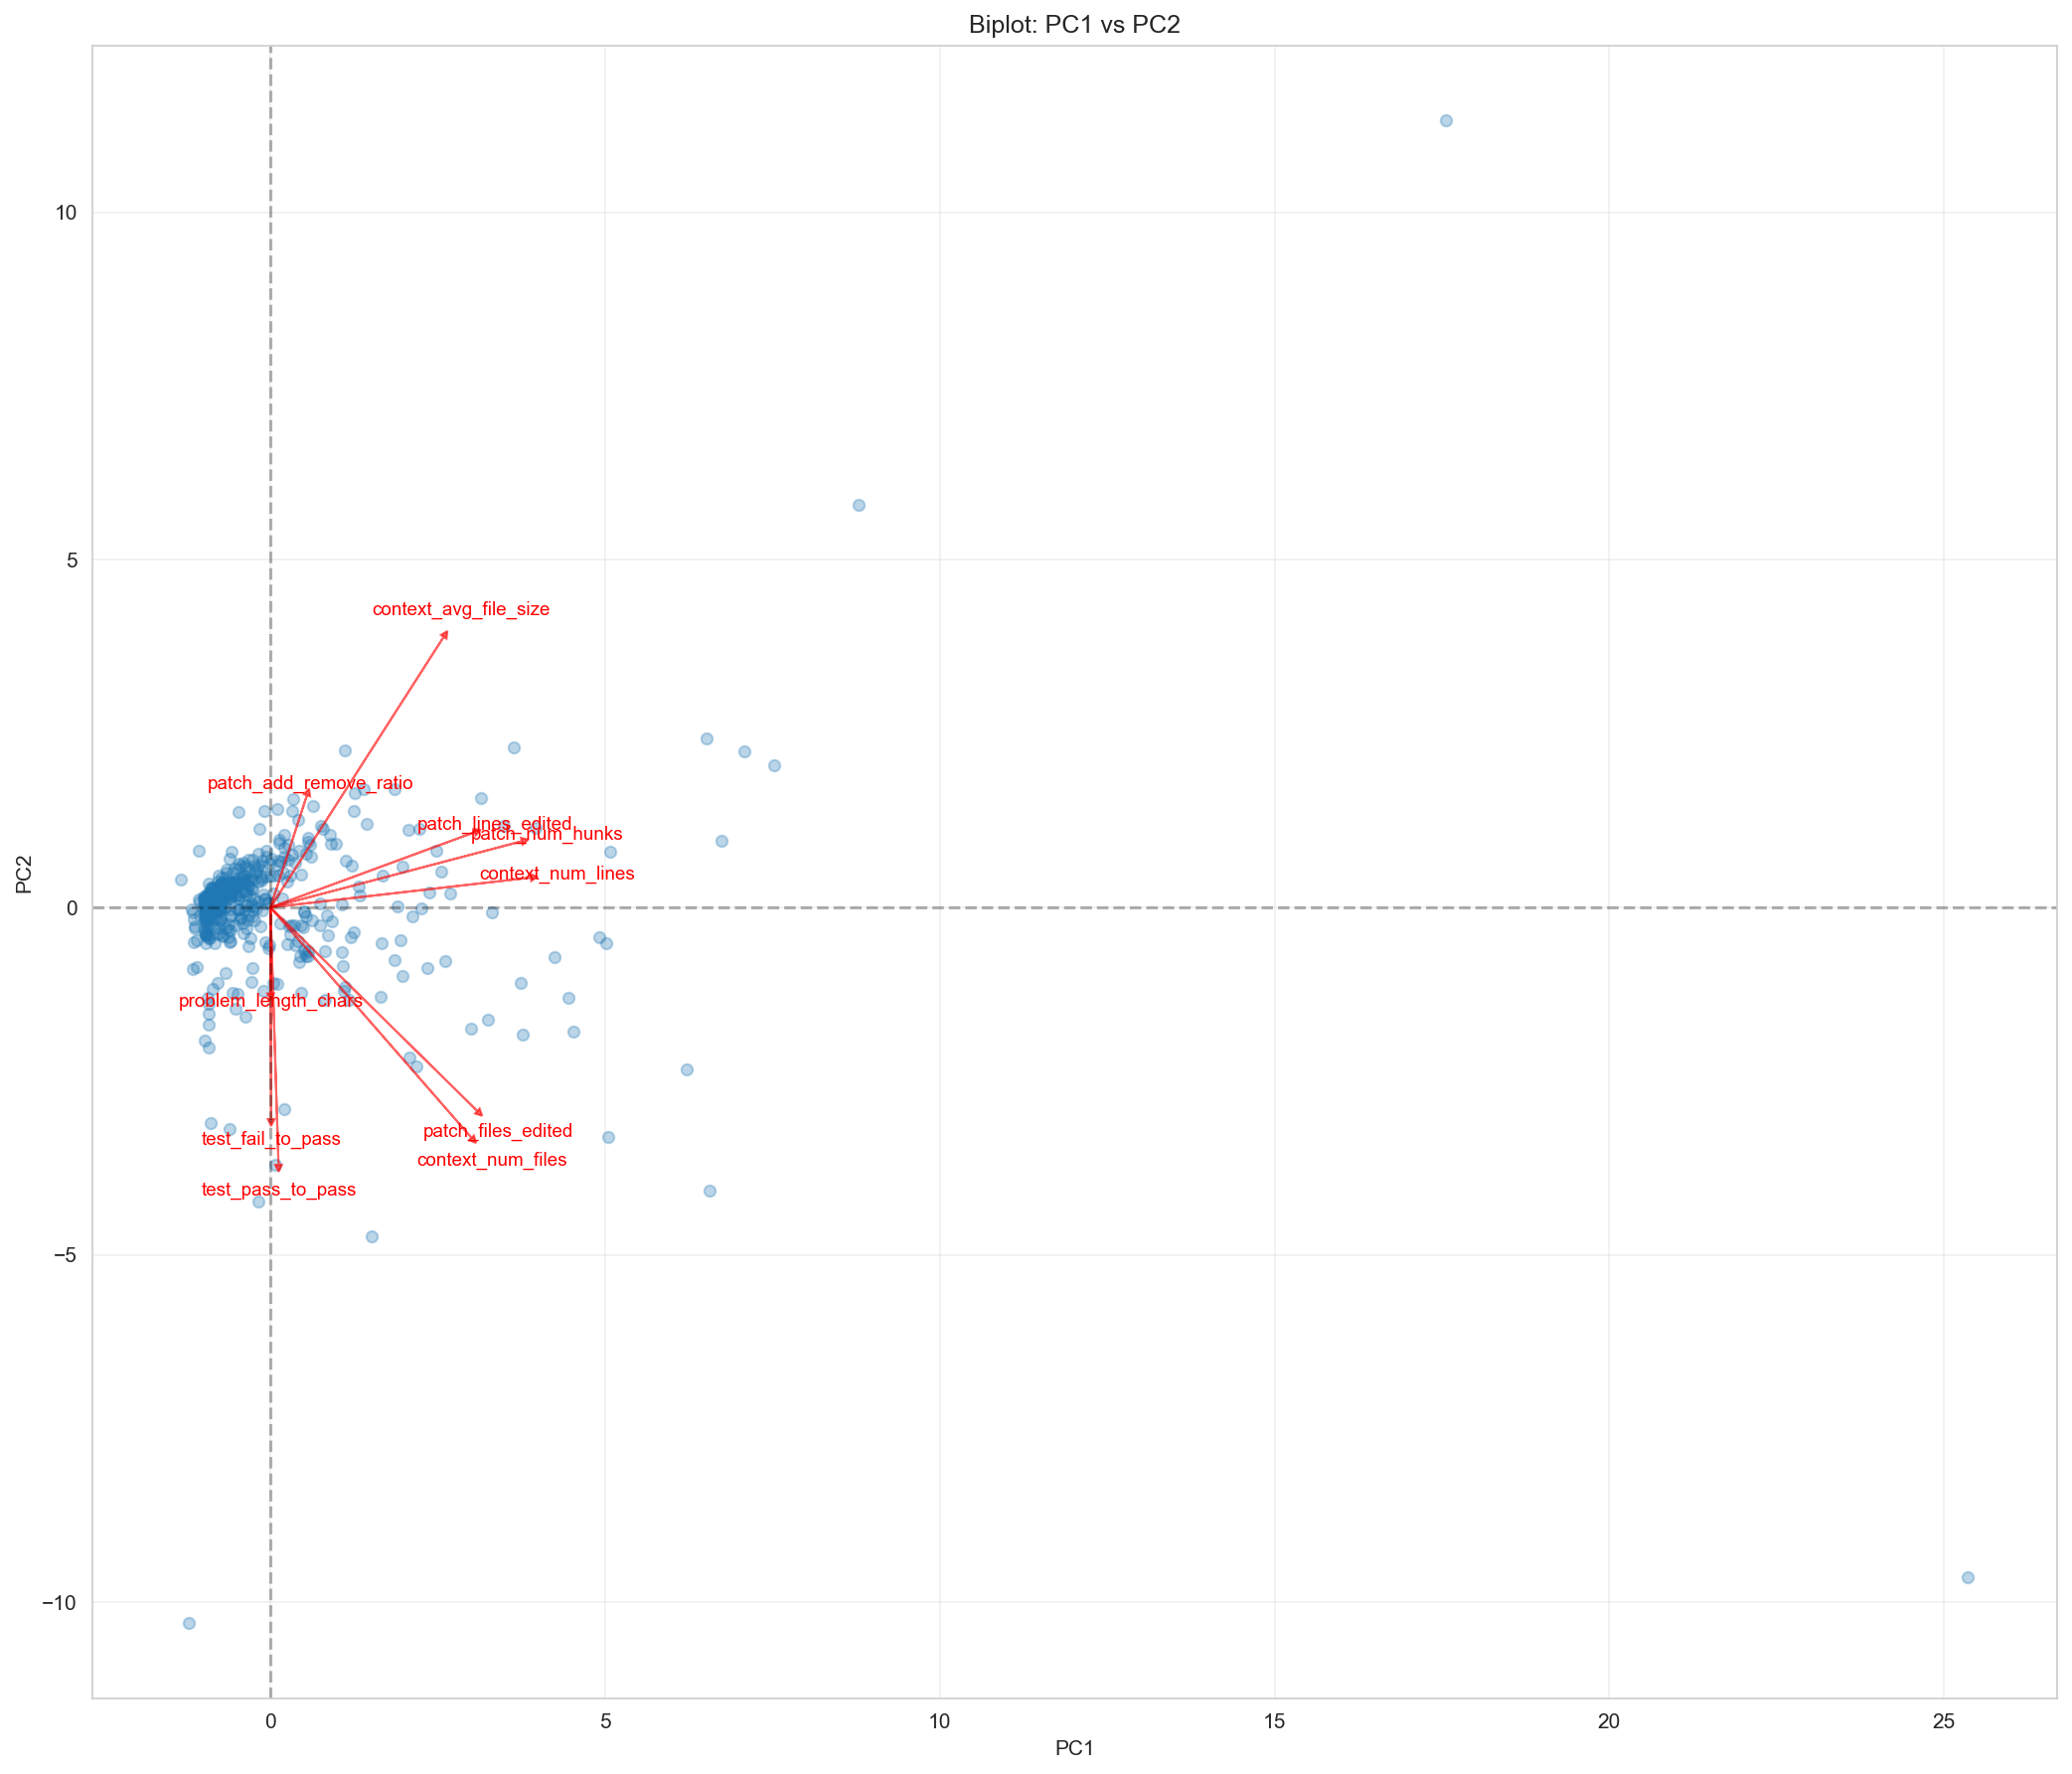

In [29]:
# biplot
fig = viz_utils.plot_biplot(
    pca_df,
    pca,
    numerical_features,
    pc1_idx=0,
    pc2_idx=1,
    n_vectors=10,
    figsize=(14, 12)
)
plt.savefig(config.PLOTS_DIR / 'biplot.png', dpi=config.FIGURE_DPI, bbox_inches='tight')
plt.show()

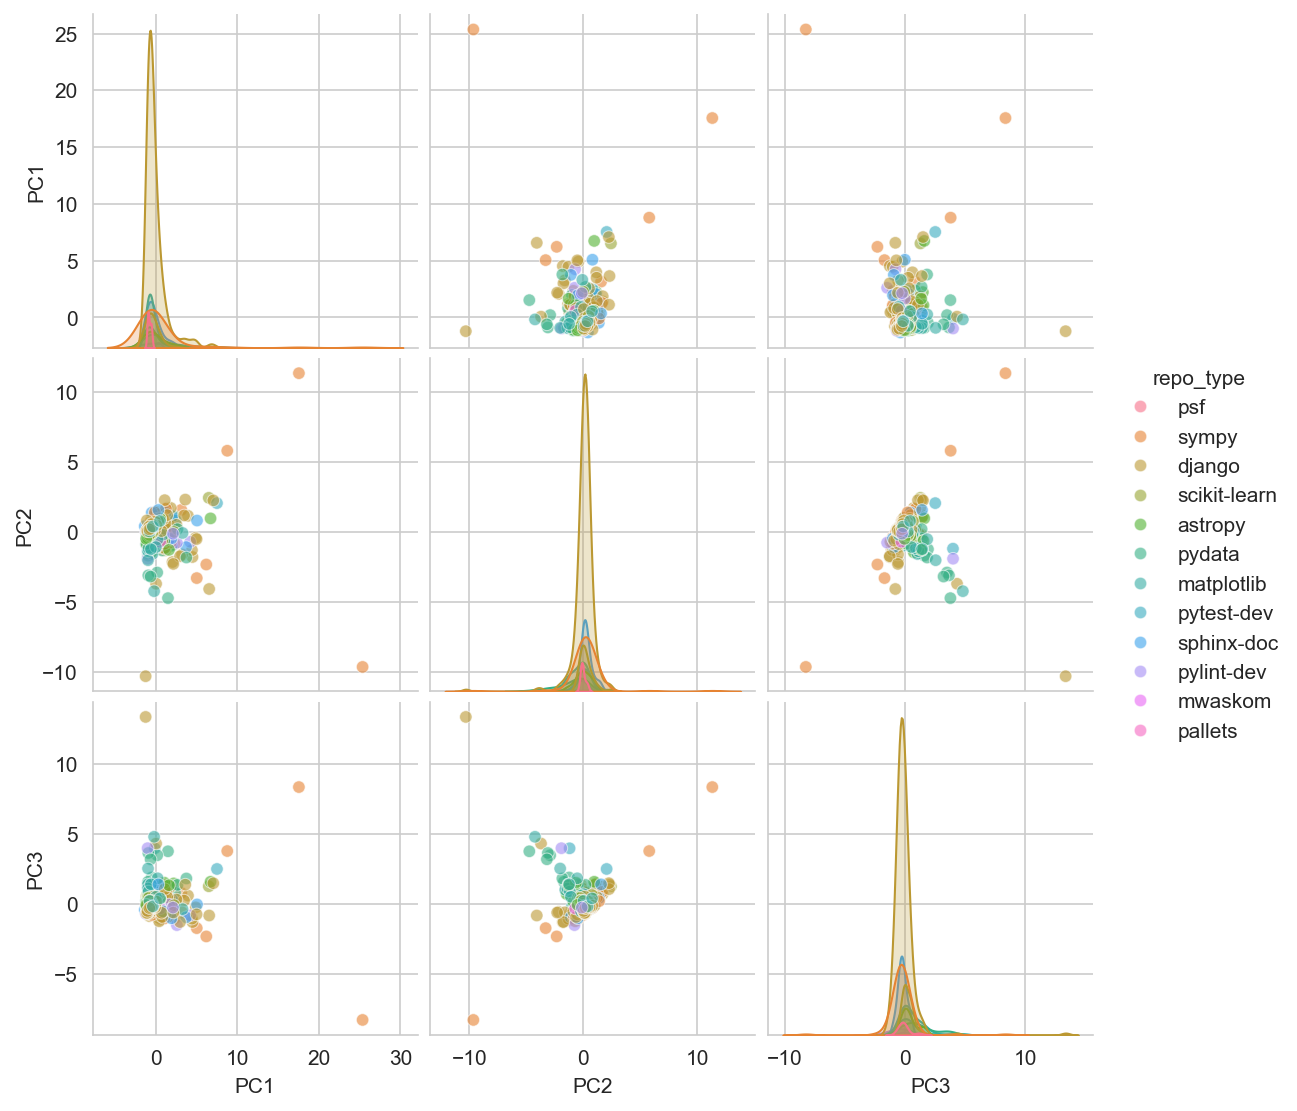

In [30]:
# pairplot
if n_components >= 2:
    components_to_plot = [f'PC{i+1}' for i in range(min(3, n_components))]
    g = viz_utils.plot_pairplot(
        pca_df, 
        components=components_to_plot,
        hue='repo_type'
    )
    plt.savefig(config.PLOTS_DIR / 'pairplot.png', dpi=config.FIGURE_DPI, bbox_inches='tight')
    plt.show()

## 6. Repository Comparison

Analyze repository differences in PCA space.

In [ ]:
df_full = pd.read_csv(config.OUTPUT_CSV)

df_full['PC1'] = pca_df['PC1'].values
df_full['PC2'] = pca_df['PC2'].values
df_full['PC3'] = pca_df['PC3'].values

original_stats = df_full.groupby('repo_type').agg({
    'problem_length_chars': 'mean',
    'patch_files_edited': 'mean',
    'patch_lines_edited': 'mean',
    'test_fail_to_pass': 'mean',
    'test_pass_to_pass': 'mean',
}).round(1)

print('\nRepository Statistics (Original Features):')
print(original_stats)

pca_stats = df_full.groupby('repo_type').agg({
    'PC1': ['mean', 'std'],
    'PC2': ['mean', 'std'],
    'PC3': ['mean', 'std']
}).round(2)

print('\nRepository Statistics (PCA Coordinates):')
print(pca_stats)


Repository Statistics (Original Features):
              problem_length_chars  patch_files_edited  patch_lines_edited  \
repo_type                                                                    
astropy                     2510.7                 1.2                27.8   
django                      1331.7                 1.2                11.8   
matplotlib                  2287.8                 1.2                 9.3   
mwaskom                     1313.0                 1.5                13.5   
pallets                      195.0                 1.0                 3.0   
psf                         1658.8                 1.0                 3.6   
pydata                      2664.7                 1.2                18.0   
pylint-dev                  3814.7                 2.1                24.7   
pytest-dev                  3364.4                 1.1                22.6   
scikit-learn                2589.2                 1.1                12.3   
sphinx-doc          

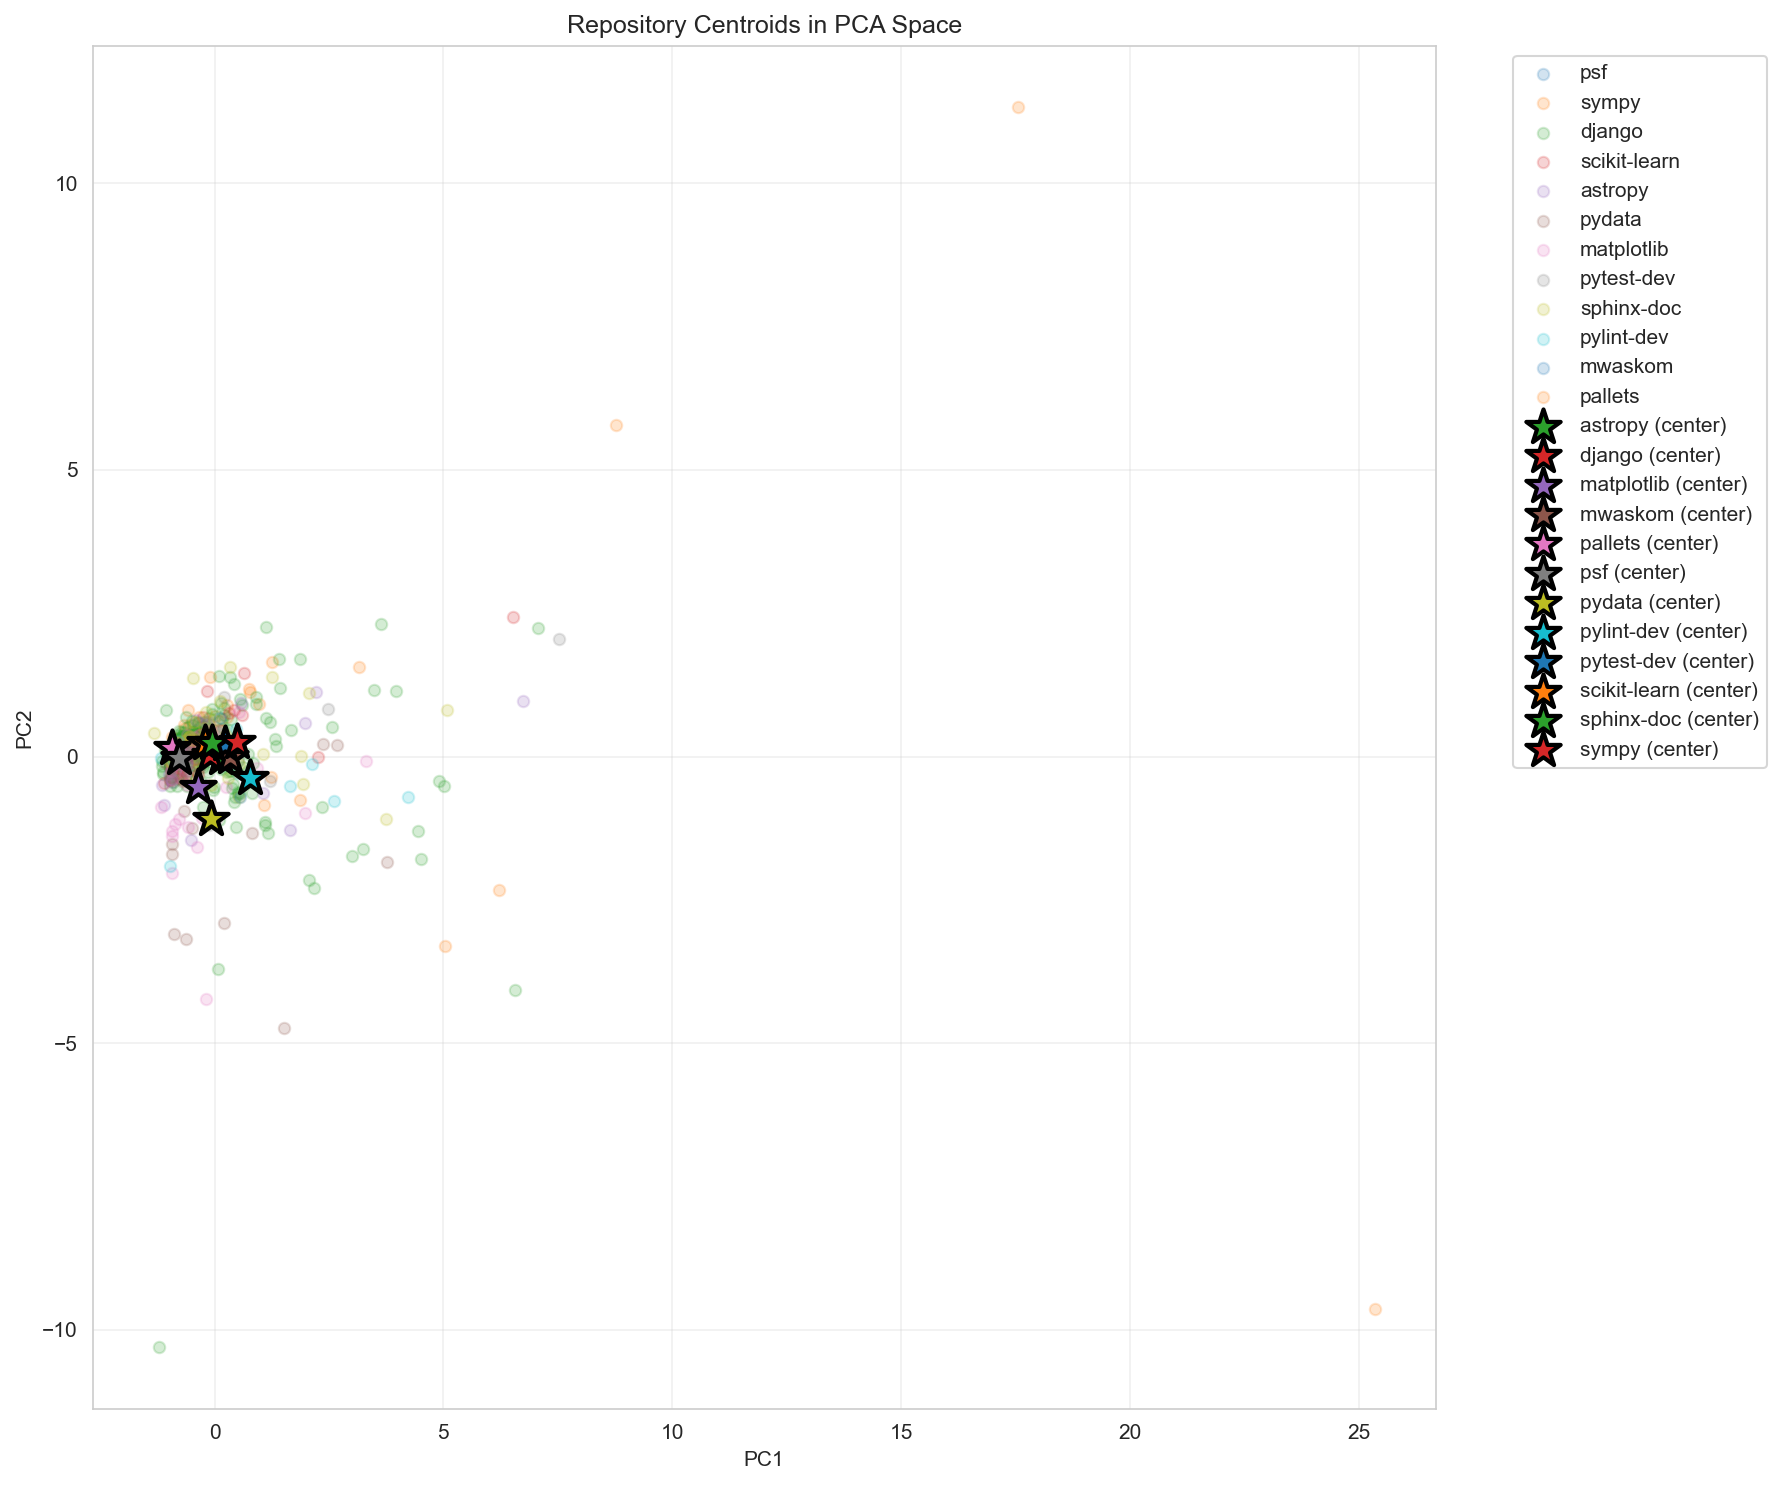

In [32]:
# repository centroids
fig = viz_utils.plot_repo_centroids(pca_df, repo_col='repo_type', pc1='PC1', pc2='PC2', figsize=(12, 10))
plt.savefig(config.PLOTS_DIR / 'repo_centroids.png', dpi=config.FIGURE_DPI, bbox_inches='tight')
plt.show()

## 7. Model Performance Overlay

This section loads MCTS evaluation results and overlays them on the PCA space to analyze:
- Which regions of PCA space are easier/harder for the model
- Correlation between PC dimensions and success rate
- Identification of challenging instance characteristics

In [ ]:
# CHANGE THIS to select another eval run
EVAL_PATH = "evals/20251112_qwen3_coder_30b_a3b_instruct_0_0_n_50_fmt_tool_call_hist_messages"

# this is only for plot titles
EVAL_NAME = "Qwen3-30B MCTS"

print(f"Evaluation path: {EVAL_PATH}")
print(f"Evaluation name: {EVAL_NAME}")

import os
if not os.path.exists(EVAL_PATH):
    print(f"\nERROR: Path does not exist!")
else:
    print(f"\nPath exists")
    
    files = os.listdir(EVAL_PATH)
    data_files = [f for f in files if f.endswith(('.json', '.csv'))]
    print(f"\nAvailable data files:")
    for f in data_files:
        file_path = os.path.join(EVAL_PATH, f)
        size = os.path.getsize(file_path) / 1024
        print(f"  - {f} ({size:.1f} KB)")

EVALUATION CONFIGURATION
Evaluation path: /Users/bautistaguerra/Documents/AI Graduate Program/source/moatless-tree-search/evals/20251112_qwen3_coder_30b_a3b_instruct_0_0_n_50_fmt_tool_call_hist_messages
Evaluation name: Qwen3-30B MCTS

Path exists

Available data files:
  - trajectories.csv (37.6 KB)
  - report.json (213.9 KB)
  - report.csv (106.5 KB)
  - evaluation.json (324.7 KB)


In [38]:
# LOAD EVALUATION RESULTS

import pandas as pd
from pathlib import Path

eval_dir = Path(EVAL_PATH)
report_csv_path = eval_dir / "report.csv"

if not report_csv_path.exists():
    raise FileNotFoundError(f"report.csv not found in {eval_dir}")

# BACKUP: load only essential columns to avoid parsing errors
print("Trying minimal column loading...")
essential_cols = ['instance_id', 'resolved', 'status', 'reward', 'iterations', 'cost']

eval_df_raw = pd.read_csv(
    report_csv_path,
    usecols=lambda col: col in essential_cols,
    engine='python',
    on_bad_lines='skip'
)

Trying minimal column loading...


In [ ]:
# EXTRACT PERFORMANCE METRICS

performance_df = eval_df_raw.copy()

if 'instance_id' in performance_df.columns:
    instance_col = 'instance_id'
else:
    id_candidates = [col for col in performance_df.columns if 'id' in col.lower() or 'instance' in col.lower()]
    instance_col = id_candidates[0] if id_candidates else performance_df.columns[0]

print(f"Using '{instance_col}' as instance identifier")

success_cols = ['resolved', 'success', 'status', 'resolved_by']
success_col = None

for col in success_cols:
    if col in performance_df.columns:
        success_col = col
        break

if success_col is None:
    raise ValueError("No success indicator column found")

print(f"Using '{success_col}' as success indicator")

# create standardized 'resolved' boolean column
if success_col == 'resolved':
    def to_bool(val):
        if pd.isna(val):
            return False
        if isinstance(val, bool):
            return val
        if isinstance(val, str):
            return val.lower() in ['true', '1', 'yes']
        if isinstance(val, (int, float)):
            return bool(val)
        return False
    
    performance_df['resolved'] = performance_df['resolved'].apply(to_bool)
    
elif success_col == 'status':
    performance_df['resolved'] = performance_df['status'].isin(['resolved', 'success', 'RESOLVED', 'finished'])
elif success_col == 'resolved_by':
    performance_df['resolved'] = performance_df['resolved_by'].notna() & (performance_df['resolved_by'] != '')
else:
    performance_df['resolved'] = performance_df[success_col].apply(to_bool)

performance_df['resolved'] = performance_df['resolved'].astype(bool)

available_metrics = [instance_col, 'resolved']

optional_cols = ['status', 'reward', 'iterations', 'cost', 'duration', 'error', 'error_message']

for col in optional_cols:
    if col in performance_df.columns and col not in available_metrics:
        available_metrics.append(col)

performance_df = performance_df[[col for col in available_metrics if col in performance_df.columns]]

if instance_col != 'instance_id':
    performance_df.rename(columns={instance_col: 'instance_id'}, inplace=True)

print(f"Total instances evaluated: {len(performance_df)}")

resolved_count = performance_df['resolved'].sum()
not_resolved_count = len(performance_df) - resolved_count

print(f"Resolved: {resolved_count} ({resolved_count/len(performance_df)*100:.1f}%)")
print(f"Not resolved: {not_resolved_count} ({not_resolved_count/len(performance_df)*100:.1f}%)")

print(performance_df.head(10))

Using 'instance_id' as instance identifier
Using 'resolved' as success indicator

PERFORMANCE METRICS EXTRACTED
Total instances evaluated: 74
Resolved: 27 (36.5%)
Not resolved: 47 (63.5%)

Available metrics: ['instance_id', 'resolved', 'status', 'reward']

Sample:
                        instance_id  resolved     status  reward
0              django__django-13590      True  completed     NaN
1              django__django-10914      True  completed     NaN
2          sphinx-doc__sphinx-11445      True  completed     NaN
3              django__django-15814     False  completed     NaN
4  scikit-learn__scikit-learn-14983     False  completed     NaN
5              django__django-14580     False  completed     NaN
6                psf__requests-2317     False  completed     NaN
7              django__django-14752      True  completed     NaN
8              django__django-13551     False  completed     NaN
9              django__django-13401      True  completed     NaN


In [ ]:
# MERGE PERFORMANCE WITH PCA DATA

# use LEFT join to keep all PCA instances (even if not evaluated)
pca_with_performance = pca_df.merge(
    performance_df,
    on='instance_id',
    how='left'
)

pca_with_performance['evaluated'] = pca_with_performance['resolved'].notna()

# For unevaluated instances, resolved = None
# For visualization, we'll treat them separately

print(f"\nPerformance on evaluated subset:")
evaluated_subset = pca_with_performance[pca_with_performance['evaluated']]
print(f"  Resolved: {evaluated_subset['resolved'].sum()} ({evaluated_subset['resolved'].mean()*100:.1f}%)")
print(f"  Not resolved: {(~evaluated_subset['resolved']).sum()}")

print(f"\nMerged dataframe shape: {pca_with_performance.shape}")
print(f"Columns: {pca_with_performance.columns.tolist()}")

PCA DATA MERGED WITH PERFORMANCE
Total instances in PCA: 500
Instances evaluated: 74
Instances not evaluated: 426

Performance on evaluated subset:
  Resolved: 27 (36.5%)
  Not resolved: -101

Merged dataframe shape: (500, 10)
Columns: ['PC1', 'PC2', 'PC3', 'is_outlier', 'instance_id', 'repo_type', 'resolved', 'status', 'reward', 'evaluated']


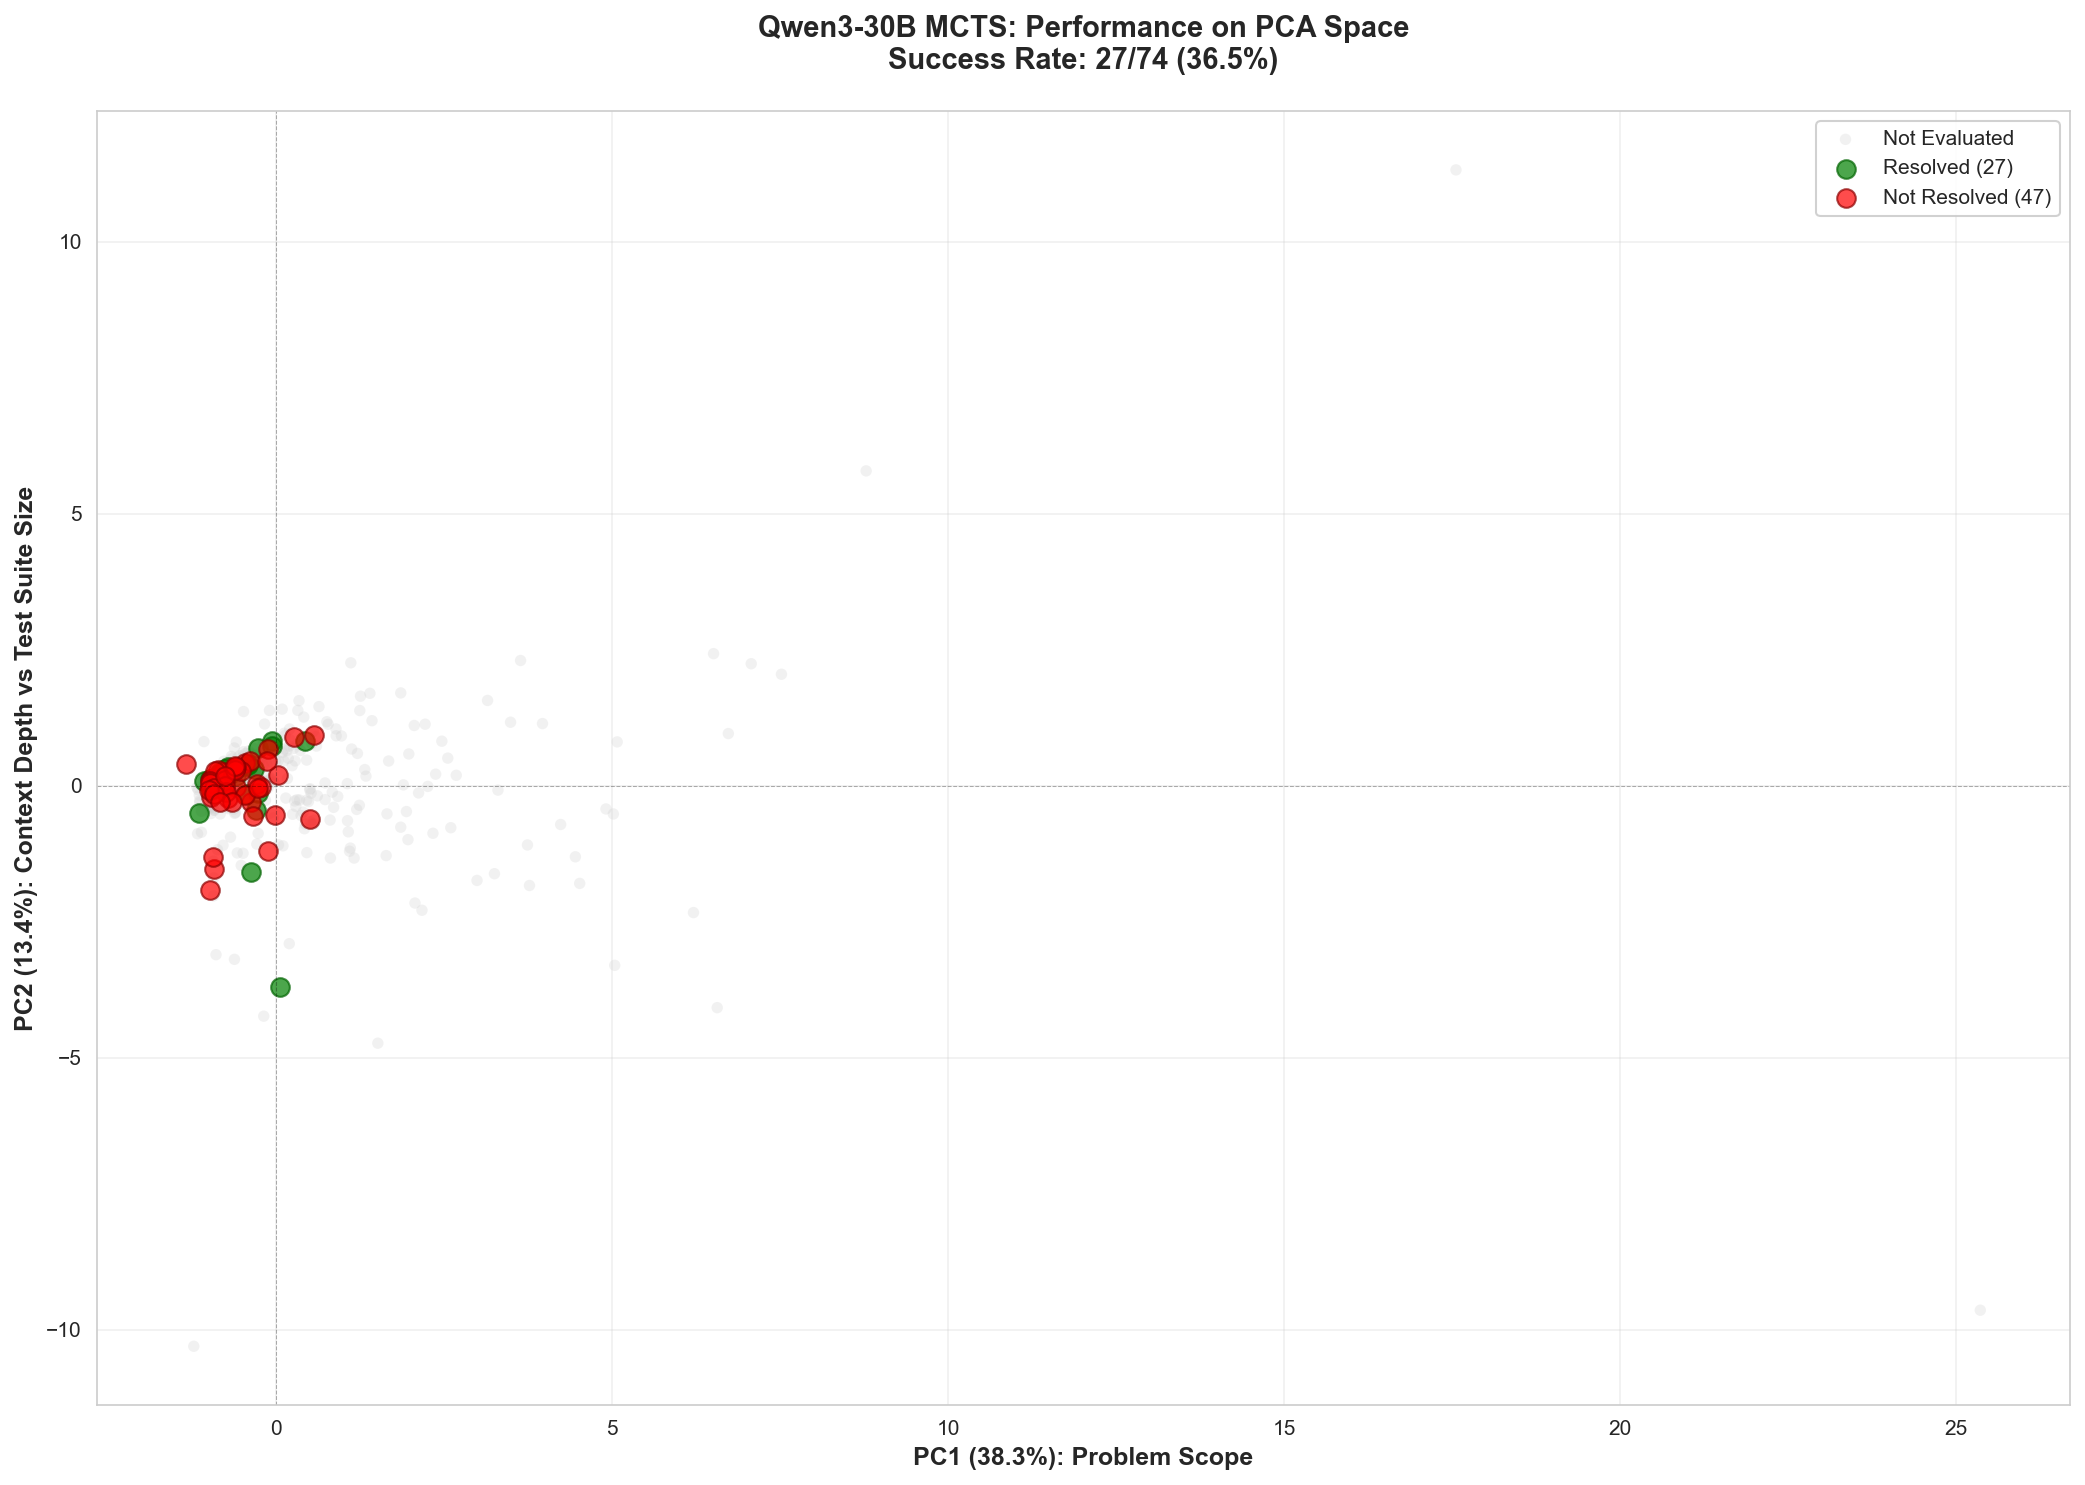

In [43]:
# VISUALIZE: PC1 vs PC2 WITH PERFORMANCE OVERLAY

fig, ax = plt.subplots(1, 1, figsize=(14, 10))

# separate data into three groups
evaluated_resolved = pca_with_performance[pca_with_performance['resolved'] == True]
evaluated_not_resolved = pca_with_performance[pca_with_performance['resolved'] == False]
not_evaluated = pca_with_performance[~pca_with_performance['evaluated']]

ax.scatter(not_evaluated['PC1'], not_evaluated['PC2'],
           c='lightgrey', alpha=0.3, s=30, label='Not Evaluated', edgecolors='none')

ax.scatter(evaluated_resolved['PC1'], evaluated_resolved['PC2'],
           c='green', alpha=0.7, s=80, label=f'Resolved ({len(evaluated_resolved)})', 
           edgecolors='darkgreen', linewidths=1)

ax.scatter(evaluated_not_resolved['PC1'], evaluated_not_resolved['PC2'],
           c='red', alpha=0.7, s=80, label=f'Not Resolved ({len(evaluated_not_resolved)})',
           edgecolors='darkred', linewidths=1)

ax.set_xlabel('PC1 (38.3%): Problem Scope', fontsize=12, fontweight='bold')
ax.set_ylabel('PC2 (13.4%): Context Depth vs Test Suite Size', fontsize=12, fontweight='bold')
ax.set_title(f'{EVAL_NAME}: Performance on PCA Space\n'
             f'Success Rate: {evaluated_resolved.shape[0]}/{evaluated_resolved.shape[0] + evaluated_not_resolved.shape[0]} '
             f'({evaluated_resolved.shape[0]/(evaluated_resolved.shape[0] + evaluated_not_resolved.shape[0])*100:.1f}%)',
             fontsize=14, fontweight='bold', pad=20)

ax.legend(loc='upper right', fontsize=10, framealpha=0.9)
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linestyle='--', linewidth=0.5, alpha=0.3)
ax.axvline(x=0, color='k', linestyle='--', linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.savefig(config.PLOTS_DIR / f'pca_performance_{EVAL_NAME.replace(" ", "_")}.png', 
            dpi=config.FIGURE_DPI, bbox_inches='tight')
plt.show()

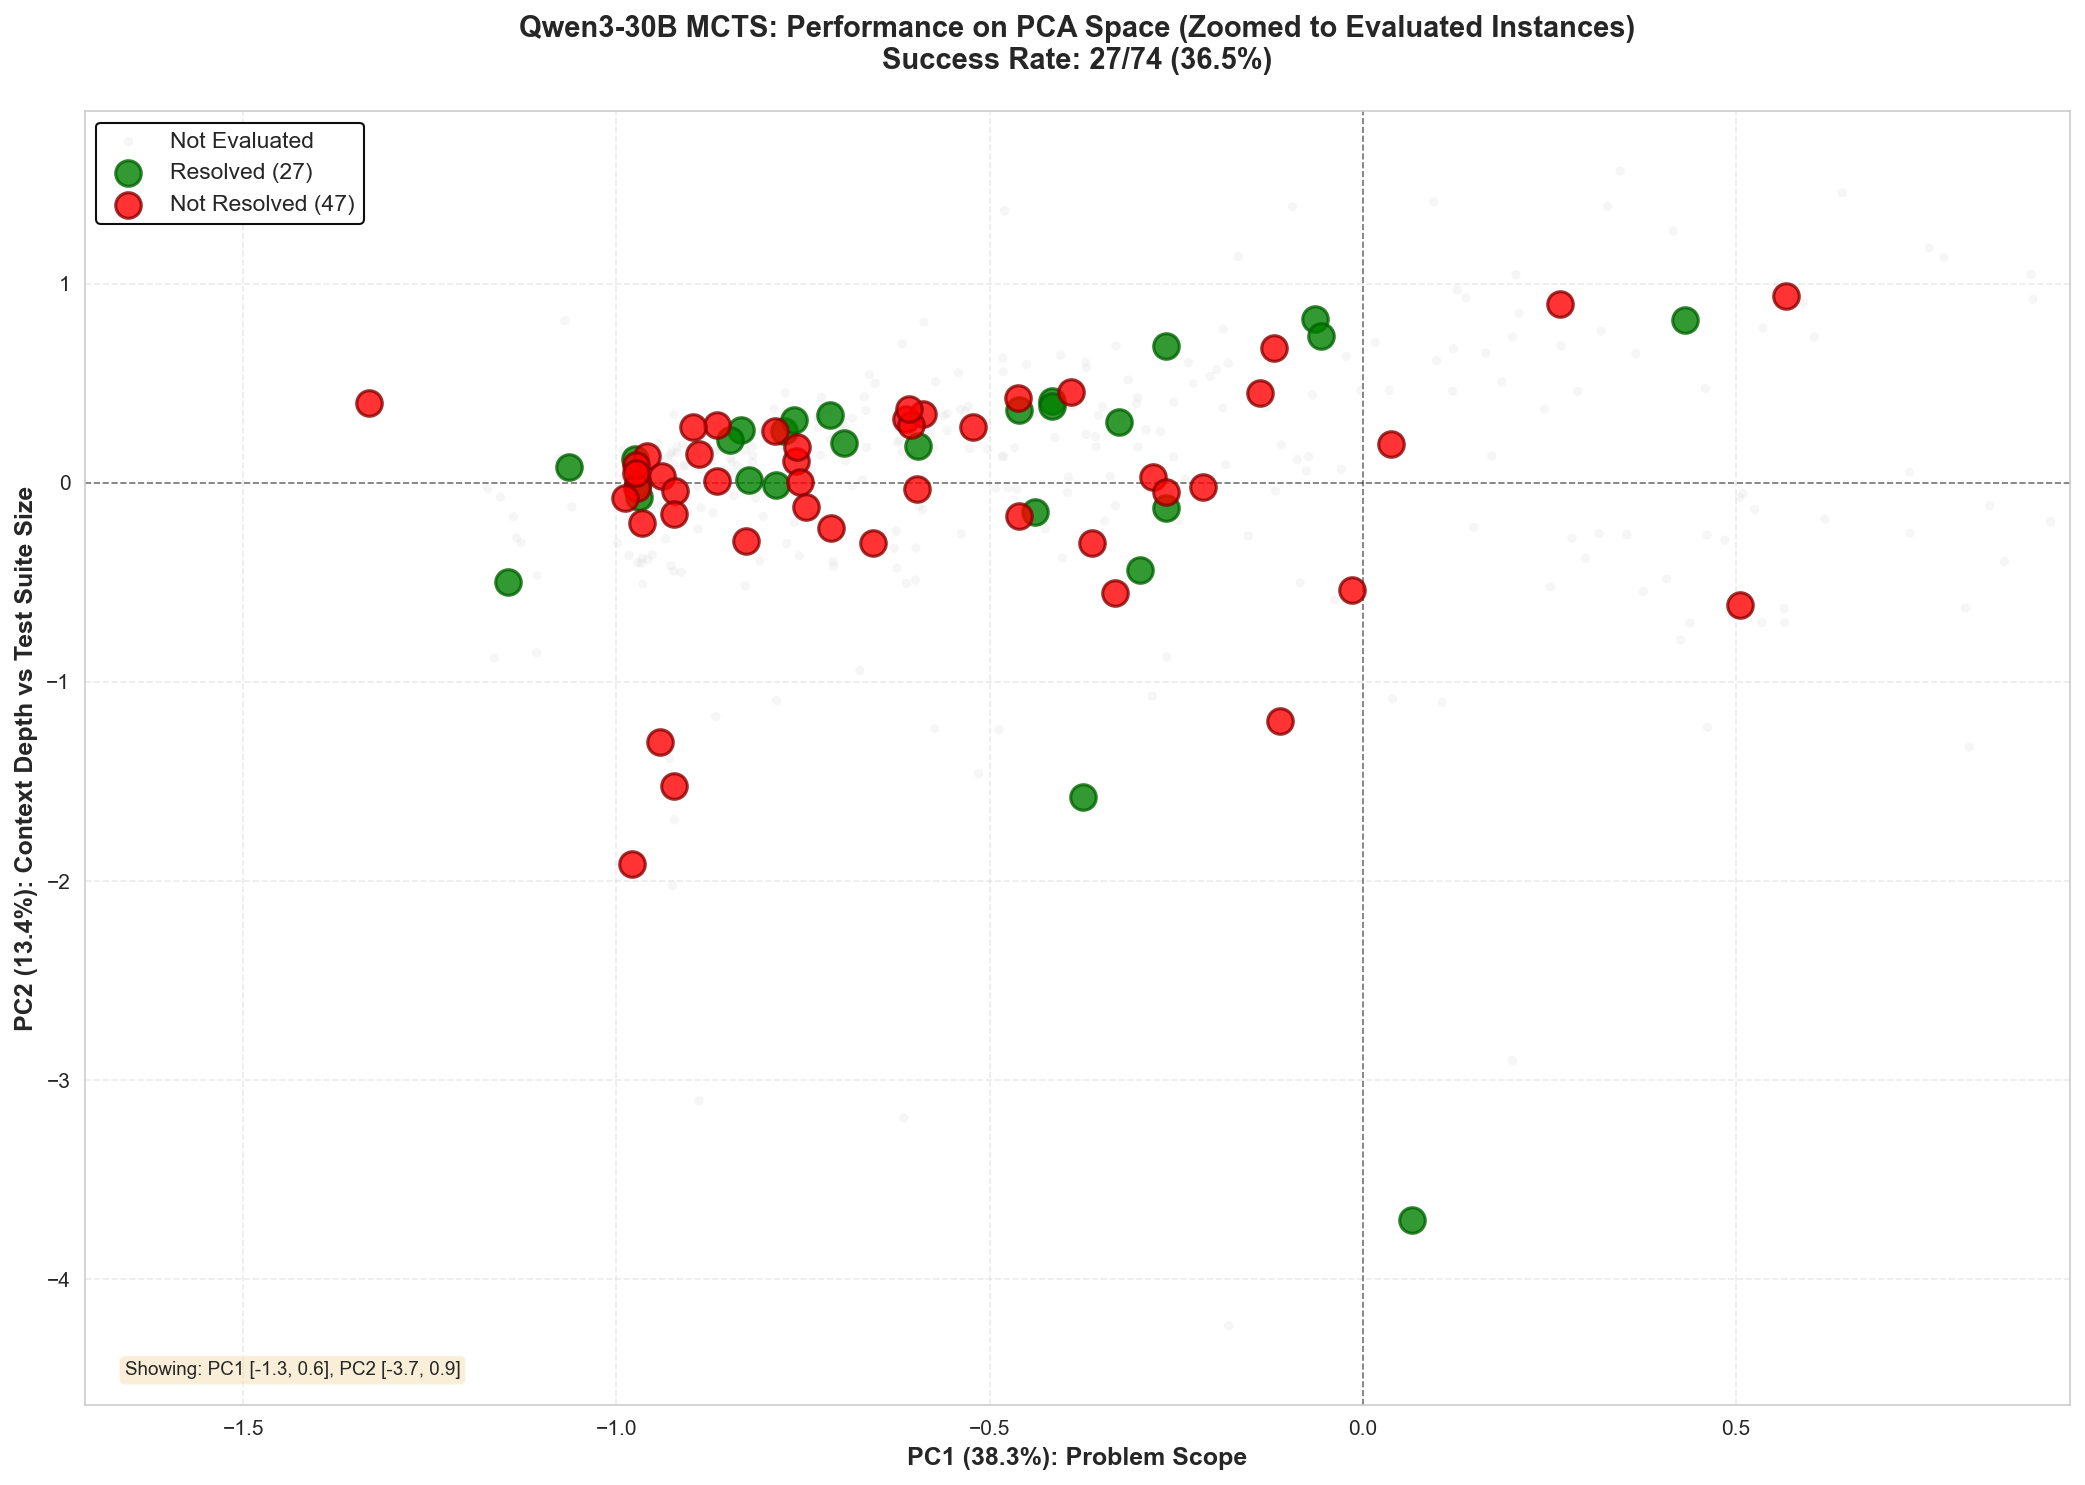


Zoom info:
  PC1 range: [-1.33, 0.57]
  PC2 range: [-3.70, 0.94]
  Evaluated instances span: PC1=1.90, PC2=4.64


In [ ]:
# VISUALIZE: PC1 vs PC2 WITH PERFORMANCE OVERLAY (zoomed only to the evaluated subset)

fig, ax = plt.subplots(1, 1, figsize=(14, 10))

evaluated_resolved = pca_with_performance[pca_with_performance['resolved'] == True]
evaluated_not_resolved = pca_with_performance[pca_with_performance['resolved'] == False]
not_evaluated = pca_with_performance[~pca_with_performance['evaluated']]

evaluated_all = pd.concat([evaluated_resolved, evaluated_not_resolved])
pc1_min, pc1_max = evaluated_all['PC1'].min(), evaluated_all['PC1'].max()
pc2_min, pc2_max = evaluated_all['PC2'].min(), evaluated_all['PC2'].max()

pc1_padding = (pc1_max - pc1_min) * 0.2
pc2_padding = (pc2_max - pc2_min) * 0.2

ax.scatter(not_evaluated['PC1'], not_evaluated['PC2'],
           c='lightgrey', alpha=0.2, s=20, label='Not Evaluated', edgecolors='none')

ax.scatter(evaluated_resolved['PC1'], evaluated_resolved['PC2'],
           c='green', alpha=0.8, s=150, label=f'Resolved ({len(evaluated_resolved)})', 
           edgecolors='darkgreen', linewidths=1.5, zorder=3)

ax.scatter(evaluated_not_resolved['PC1'], evaluated_not_resolved['PC2'],
           c='red', alpha=0.8, s=150, label=f'Not Resolved ({len(evaluated_not_resolved)})',
           edgecolors='darkred', linewidths=1.5, zorder=3)

ax.set_xlim(pc1_min - pc1_padding, pc1_max + pc1_padding)
ax.set_ylim(pc2_min - pc2_padding, pc2_max + pc2_padding)

ax.set_xlabel('PC1 (38.3%): Problem Scope', fontsize=12, fontweight='bold')
ax.set_ylabel('PC2 (13.4%): Context Depth vs Test Suite Size', fontsize=12, fontweight='bold')

total_evaluated = len(evaluated_resolved) + len(evaluated_not_resolved)
success_rate = len(evaluated_resolved) / total_evaluated * 100

ax.set_title(f'{EVAL_NAME}: Performance on PCA Space (Zoomed to Evaluated Instances)\n'
             f'Success Rate: {len(evaluated_resolved)}/{total_evaluated} ({success_rate:.1f}%)',
             fontsize=14, fontweight='bold', pad=20)

ax.legend(loc='best', fontsize=11, framealpha=0.95, edgecolor='black')
ax.grid(True, alpha=0.4, linestyle='--')

if pc2_min - pc2_padding <= 0 <= pc2_max + pc2_padding:
    ax.axhline(y=0, color='k', linestyle='--', linewidth=0.8, alpha=0.5)
if pc1_min - pc1_padding <= 0 <= pc1_max + pc1_padding:
    ax.axvline(x=0, color='k', linestyle='--', linewidth=0.8, alpha=0.5)

zoom_text = f'Showing: PC1 [{pc1_min:.1f}, {pc1_max:.1f}], PC2 [{pc2_min:.1f}, {pc2_max:.1f}]'
ax.text(0.02, 0.02, zoom_text, transform=ax.transAxes, 
        fontsize=9, verticalalignment='bottom', bbox=dict(boxstyle='round', 
        facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig(config.PLOTS_DIR / f'pca_performance_zoomed_{EVAL_NAME.replace(" ", "_")}.png', 
            dpi=config.FIGURE_DPI, bbox_inches='tight')
plt.show()